# Q4. Can you detect cascading failures as delays in one airport create delays in others?

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Opening the datasets with necessary columns and concatenating the two years

In [2]:
dataset_2006 = pd.read_csv("2006.csv", usecols = ['Year','Month','DayofMonth','DepTime','TailNum','DepDelay'])
dataset_2007 = pd.read_csv("2007.csv", usecols = ['Year','Month','DayofMonth','DepTime','TailNum','DepDelay'])
main_dataset = pd.concat([dataset_2006, dataset_2007])

Checking for null vallues and cleaning them

In [3]:
pd.isnull(main_dataset).sum(axis = 0)

Year               0
Month              0
DayofMonth         0
DepTime       282682
TailNum           22
DepDelay      282682
dtype: int64

In [4]:
main_dataset = main_dataset[pd.notnull(main_dataset['TailNum'])]
main_dataset = main_dataset[pd.notnull(main_dataset['DepDelay'])]
main_dataset = main_dataset[pd.notnull(main_dataset['DepTime'])]

In [5]:
pd.isnull(main_dataset).sum(axis = 0)

Year          0
Month         0
DayofMonth    0
DepTime       0
TailNum       0
DepDelay      0
dtype: int64

Creating a column with timestamps

In [6]:
main_dataset.rename(columns={'Year': 'year', 'Month': 'month','DayofMonth': 'day'}, inplace=True)
main_dataset['date'] = pd.to_datetime(main_dataset[['year', 'month', 'day']])

In [7]:
main_dataset['DepTime'] = pd.to_datetime(main_dataset.DepTime, errors='coerce', format='%H%M').dt.strftime('%H:%M')
main_dataset = main_dataset[pd.notnull(main_dataset['DepTime'])]

In [8]:
main_dataset

year  month  day DepTime TailNum  DepDelay       date
0        2006      1   11   07:43  N657AW      -2.0 2006-01-11
1        2006      1   11   10:53  N834AW       0.0 2006-01-11
2        2006      1   11   19:15  N605AW       0.0 2006-01-11
3        2006      1   11   17:53  N312AW      -2.0 2006-01-11
4        2006      1   11   08:24  N309AW      -8.0 2006-01-11
...       ...    ...  ...     ...     ...       ...        ...
7453210  2007     12   15   15:58  N670DN      -7.0 2007-12-15
7453211  2007     12   15   19:02  N829MH      11.0 2007-12-15
7453212  2007     12   15   10:24  N623DL      -1.0 2007-12-15
7453213  2007     12   15   13:53  N970DL      38.0 2007-12-15
7453214  2007     12   15   18:24  N628DL      24.0 2007-12-15

[14300685 rows x 7 columns]

In [9]:
main_dataset['date'] = main_dataset['date'].astype(str) 
main_dataset['DepTime'] = main_dataset['DepTime'].astype(str)

In [10]:
main_dataset['timestamp'] = (main_dataset['date'] + main_dataset['DepTime'])

In [11]:
main_dataset['timestamp'] = pd.to_datetime(main_dataset['timestamp'], format='%Y-%m-%d%H:%M')

In [12]:
pd.isnull(main_dataset).sum(axis = 0)

year         0
month        0
day          0
DepTime      0
TailNum      0
DepDelay     0
date         0
timestamp    0
dtype: int64

In [13]:
main_dataset

year  month  day DepTime TailNum  DepDelay        date  \
0        2006      1   11   07:43  N657AW      -2.0  2006-01-11   
1        2006      1   11   10:53  N834AW       0.0  2006-01-11   
2        2006      1   11   19:15  N605AW       0.0  2006-01-11   
3        2006      1   11   17:53  N312AW      -2.0  2006-01-11   
4        2006      1   11   08:24  N309AW      -8.0  2006-01-11   
...       ...    ...  ...     ...     ...       ...         ...   
7453210  2007     12   15   15:58  N670DN      -7.0  2007-12-15   
7453211  2007     12   15   19:02  N829MH      11.0  2007-12-15   
7453212  2007     12   15   10:24  N623DL      -1.0  2007-12-15   
7453213  2007     12   15   13:53  N970DL      38.0  2007-12-15   
7453214  2007     12   15   18:24  N628DL      24.0  2007-12-15   

                  timestamp  
0       2006-01-11 07:43:00  
1       2006-01-11 10:53:00  
2       2006-01-11 19:15:00  
3       2006-01-11 17:53:00  
4       2006-01-11 08:24:00  
...                     ...  
7453210 2007-12-15 15:58:00  
7453211 2007-12-15 19:02:00  
7453212 2007-12-15 10:24:00  
7453213 2007-12-15 13:53:00  
7453214 2007-12-15 18:24:00  

[14300685 rows x 8 columns]

Sorting the dataframe by the timestamp to get the delays in the same order of their occurance 

In [14]:
main_dataset = main_dataset.sort_values(by=['timestamp'])

Making a 2D dataframe with tail number as index and the specific plane's delays in the same order of their occurrence

In [15]:
def f(x):
    print(x)
    return pd.Series(x['DepDelay'].values, index=range(len(x)))

In [16]:
heatmap = main_dataset.groupby('TailNum').apply(f).unstack()

         year  month  day DepTime TailNum  DepDelay        date  \
503597   2006      1    1   20:36       0      51.0  2006-01-01   
424297   2006      1    1   20:55       0       0.0  2006-01-01   
503990   2006      1    2   20:36       0      51.0  2006-01-02   
425159   2006      1    2   21:45       0     100.0  2006-01-02   
504383   2006      1    3   21:01       0      76.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
6937589  2007     12   31   06:42       0      12.0  2007-12-31   
7373965  2007     12   31   07:41       0       8.0  2007-12-31   
6968662  2007     12   31   14:34       0      49.0  2007-12-31   
6967638  2007     12   31   16:51       0      -4.0  2007-12-31   
6936444  2007     12   31   17:32       0      -3.0  2007-12-31   

                  timestamp  
503597  2006-01-01 20:36:00  
424297  2006-01-01 20:55:00  
503990  2006-01-02 20:36:00  
425159  2006-01-02 21:45:00  
504383  2006-01-03 21:01:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
466435   2007      1    1   08:20  85019E      -5.0  2007-01-01   
466434   2007      1    1   09:37  85019E      -3.0  2007-01-01   
466665   2007      1    1   11:39  85019E      -4.0  2007-01-01   
466664   2007      1    1   14:25  85019E       0.0  2007-01-01   
466309   2007      1    1   18:02  85019E      22.0  2007-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7321016  2007     12   31   08:33  85019E     123.0  2007-12-31   
7320781  2007     12   31   11:56  85019E     103.0  2007-12-31   
7320919  2007     12   31   14:17  85019E     107.0  2007-12-31   
7320827  2007     12   31   17:09  85019E     190.0  2007-12-31   
7321258  2007     12   31   19:12  85019E     173.0  2007-12-31   

                  timestamp  
466435  2007-01-01 08:20:00  
466434  2007-01-01 09:37:00  
466665  2007-01-01 11:39:00  
466664  2007-01-01 14:25:00  
466309  2007-01-01 18:02:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
466193   2007      1    1   06:47  87109E      17.0  2007-01-01   
466579   2007      1    1   10:25  87109E      14.0  2007-01-01   
466537   2007      1    1   12:23  87109E      -7.0  2007-01-01   
466589   2007      1    1   15:43  87109E     123.0  2007-01-01   
466183   2007      1    1   18:11  87109E     123.0  2007-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7320807  2007     12   31   08:57  87109E      -3.0  2007-12-31   
7321102  2007     12   31   10:03  87109E      -2.0  2007-12-31   
7320711  2007     12   31   13:46  87109E       0.0  2007-12-31   
7320592  2007     12   31   15:54  87109E      -5.0  2007-12-31   
7320808  2007     12   31   21:00  87109E      98.0  2007-12-31   

                  timestamp  
466193  2007-01-01 06:47:00  
466579  2007-01-01 10:25:00  
466537  2007-01-01 12:23:00  
466589  2007-01-01 15:43:00  
466183  2007-01-01 18:11:00  
...            

[1848 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
466117   2007      1    1   17:15  89309E     126.0  2007-01-01   
466675   2007      1    1   19:25  89309E     130.0  2007-01-01   
466506   2007      1    1   20:11  89309E      26.0  2007-01-01   
467194   2007      1    2   06:07  89309E      -3.0  2007-01-02   
467111   2007      1    2   09:10  89309E      20.0  2007-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7320671  2007     12   31   11:20  89309E      20.0  2007-12-31   
7320759  2007     12   31   13:50  89309E      17.0  2007-12-31   
7320861  2007     12   31   15:18  89309E      -2.0  2007-12-31   
7320748  2007     12   31   19:19  89309E     126.0  2007-12-31   
7320674  2007     12   31   21:00  89309E     117.0  2007-12-31   

                  timestamp  
466117  2007-01-01 17:15:00  
466675  2007-01-01 19:25:00  
466506  2007-01-01 20:11:00  
467194  2007-01-02 06:07:00  
467111  2007-01-02 09

[761 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
452609   2006      1    1   13:31  N069AA       0.0  2006-01-01   
470086   2006      1    1   18:47  N069AA       0.0  2006-01-01   
480441   2006      1    2   08:21  N069AA       6.0  2006-01-02   
466808   2006      1    2   13:08  N069AA       9.0  2006-01-02   
485894   2006      1    3   14:04  N069AA      14.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
7356033  2007     12   25   20:40  N069AA       0.0  2007-12-25   
7359676  2007     12   26   07:11  N069AA      -4.0  2007-12-26   
7356037  2007     12   29   20:36  N069AA      -4.0  2007-12-29   
7359680  2007     12   30   07:41  N069AA      26.0  2007-12-30   
7362267  2007     12   31   18:45  N069AA      -5.0  2007-12-31   

                  timestamp  
452609  2006-01-01 13:31:00  
470086  2006-01-01 18:47:00  
480441  2006-01-02 08:21:00  
466808  2006-01-02 13:08:00  
485894  2006-01-03 14:

         year  month  day DepTime TailNum  DepDelay        date  \
223981   2006      1    1   12:28  N11121      -2.0  2006-01-01   
210448   2006      1    1   15:04  N11121      -6.0  2006-01-01   
231187   2006      1    1   18:57  N11121      -3.0  2006-01-01   
203350   2006      1    2   06:48  N11121      -2.0  2006-01-02   
208068   2006      1    2   08:38  N11121      -2.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
6961865  2007     12   30   20:48  N11121       8.0  2007-12-30   
6952227  2007     12   31   09:03  N11121       3.0  2007-12-31   
6940435  2007     12   31   12:32  N11121      -2.0  2007-12-31   
6952536  2007     12   31   16:40  N11121      -5.0  2007-12-31   
6943798  2007     12   31   20:08  N11121      -2.0  2007-12-31   

                  timestamp  
223981  2006-01-01 12:28:00  
210448  2006-01-01 15:04:00  
231187  2006-01-01 18:57:00  
203350  2006-01-02 06:48:00  
208068  2006-01-02 08:38:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
2903820  2006      5   29   17:19  N120DL      -1.0  2006-05-29   
2905250  2006      5   30   09:32  N120DL      -3.0  2006-05-30   
2905628  2006      5   30   12:08  N120DL      -4.0  2006-05-30   
2904820  2006      5   30   18:33  N120DL      -2.0  2006-05-30   
2905495  2006      5   30   21:48  N120DL      -2.0  2006-05-30   
...       ...    ...  ...     ...     ...       ...         ...   
5304622  2007      9   18   11:17  N120DL       2.0  2007-09-18   
5305414  2007      9   18   20:26  N120DL      -4.0  2007-09-18   
5306219  2007      9   19   06:58  N120DL      -2.0  2007-09-19   
5306220  2007      9   19   09:37  N120DL      -3.0  2007-09-19   
5306204  2007      9   19   11:58  N120DL      -2.0  2007-09-19   

                  timestamp  
2903820 2006-05-29 17:19:00  
2905250 2006-05-30 09:32:00  
2905628 2006-05-30 12:08:00  
2904820 2006-05-30 18:33:00  
2905495 2006-05-30 21:48:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
214265   2006      1    1   06:50  N12528     -10.0  2006-01-01   
206902   2006      1    1   11:50  N12528     -10.0  2006-01-01   
229314   2006      1    1   14:16  N12528      -9.0  2006-01-01   
208148   2006      1    1   18:33  N12528      -2.0  2006-01-01   
209708   2006      1    2   05:52  N12528      -3.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
6952153  2007     12   31   07:03  N12528      -2.0  2007-12-31   
6945861  2007     12   31   08:43  N12528     -12.0  2007-12-31   
6945398  2007     12   31   10:58  N12528      -2.0  2007-12-31   
6950352  2007     12   31   12:54  N12528      -6.0  2007-12-31   
6953390  2007     12   31   15:39  N12528       9.0  2007-12-31   

                  timestamp  
214265  2006-01-01 06:50:00  
206902  2006-01-01 11:50:00  
229314  2006-01-01 14:16:00  
208148  2006-01-01 18:33:00  
209708  2006-01-02 05:52:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
224393   2006      1    1   12:15  N13553       0.0  2006-01-01   
203808   2006      1    1   14:36  N13553      16.0  2006-01-01   
213633   2006      1    1   16:36  N13553       9.0  2006-01-01   
218654   2006      1    1   18:54  N13553       9.0  2006-01-01   
213750   2006      1    2   06:22  N13553      -8.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
6937071  2007     12   31   10:57  N13553      -8.0  2007-12-31   
6938112  2007     12   31   12:57  N13553      -3.0  2007-12-31   
6938230  2007     12   31   14:17  N13553      -8.0  2007-12-31   
6935766  2007     12   31   15:53  N13553      -2.0  2007-12-31   
6935797  2007     12   31   19:11  N13553      -9.0  2007-12-31   

                  timestamp  
224393  2006-01-01 12:15:00  
203808  2006-01-01 14:36:00  
213633  2006-01-01 16:36:00  
218654  2006-01-01 18:54:00  
213750  2006-01-02 06:22:00  
...            

[938 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
533554   2006      1   18   20:40  N14115      91.0  2006-01-18   
522180   2006      1   19   06:58  N14115      -2.0  2006-01-19   
515092   2006      1   19   09:05  N14115      -5.0  2006-01-19   
531376   2006      1   19   11:33  N14115      -4.0  2006-01-19   
528512   2006      1   19   16:56  N14115      61.0  2006-01-19   
...       ...    ...  ...     ...     ...       ...         ...   
7421206  2007     12   27   14:50  N14115      15.0  2007-12-27   
7412697  2007     12   27   18:35  N14115      10.0  2007-12-27   
7411120  2007     12   29   13:38  N14115      38.0  2007-12-29   
7415677  2007     12   31   13:43  N14115      28.0  2007-12-31   
7408654  2007     12   31   17:41  N14115      23.0  2007-12-31   

                  timestamp  
533554  2006-01-18 20:40:00  
522180  2006-01-19 06:58:00  
515092  2006-01-19 09:05:00  
531376  2006-01-19 11:33:00  
528512  2006-01-19 16:

         year  month  day DepTime TailNum  DepDelay        date  \
526015   2006      1    1   08:42  N14336      -3.0  2006-01-01   
526392   2006      1    1   16:13  N14336      23.0  2006-01-01   
533516   2006      1    2   06:30  N14336       0.0  2006-01-02   
536867   2006      1    2   08:27  N14336      -3.0  2006-01-02   
520651   2006      1    2   10:25  N14336       0.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7429457  2007     12   30   13:23  N14336      23.0  2007-12-30   
7434570  2007     12   30   18:52  N14336      67.0  2007-12-30   
7432813  2007     12   31   06:43  N14336      -2.0  2007-12-31   
7408042  2007     12   31   10:40  N14336       0.0  2007-12-31   
7426745  2007     12   31   14:27  N14336      72.0  2007-12-31   

                  timestamp  
526015  2006-01-01 08:42:00  
526392  2006-01-01 16:13:00  
533516  2006-01-02 06:30:00  
536867  2006-01-02 08:27:00  
520651  2006-01-02 10:25:00  
...            

[3560 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
210792   2006      1    1   09:51  N14907      -9.0  2006-01-01   
226198   2006      1    1   12:14  N14907      -6.0  2006-01-01   
226480   2006      1    1   14:22  N14907      -8.0  2006-01-01   
215791   2006      1    1   16:30  N14907       0.0  2006-01-01   
216365   2006      1    1   17:45  N14907     -10.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6938174  2007     12   31   08:18  N14907      -7.0  2007-12-31   
6938081  2007     12   31   09:56  N14907       1.0  2007-12-31   
6938143  2007     12   31   11:32  N14907      -3.0  2007-12-31   
6937102  2007     12   31   14:43  N14907      13.0  2007-12-31   
6935223  2007     12   31   18:45  N14907      25.0  2007-12-31   

                  timestamp  
210792  2006-01-01 09:51:00  
226198  2006-01-01 12:14:00  
226480  2006-01-01 14:22:00  
215791  2006-01-01 16:30:00  
216365  2006-01-01 17

         year  month  day DepTime TailNum  DepDelay        date  \
576610   2006      1   27   15:29  N155DL      -1.0  2006-01-27   
578184   2006      1   28   17:54  N155DL      -1.0  2006-01-28   
1683952  2006      3    7   17:26  N155DL      -4.0  2006-03-07   
4104071  2006      7   15   17:46  N155DL      11.0  2006-07-15   
4111535  2006      7   20   15:56  N155DL      26.0  2006-07-20   
4111557  2006      7   20   17:45  N155DL       8.0  2006-07-20   
4751464  2006      8   29   15:10  N155DL      70.0  2006-08-29   
6512177  2006     11   11   11:38  N155DL      18.0  2006-11-11   
6512867  2006     11   11   14:18  N155DL       8.0  2006-11-11   
6522713  2006     11   19   08:48  N155DL      -1.0  2006-11-19   
6523078  2006     11   19   12:04  N155DL      -1.0  2006-11-19   
614426   2007      1   12   09:13  N155DL      -3.0  2007-01-12   
614470   2007      1   12   14:55  N155DL      -5.0  2007-01-12   
906321   2007      2   17   09:17  N155DL      17.0  2007-02-1

         year  month  day DepTime TailNum  DepDelay        date  \
521397   2006      1    4   10:58  N16310      68.0  2006-01-04   
526121   2006      1    4   13:52  N16310      17.0  2006-01-04   
517263   2006      1    5   19:12  N16310      -3.0  2006-01-05   
528254   2006      1    6   06:57  N16310      -3.0  2006-01-06   
531879   2006      1    6   09:30  N16310      -5.0  2006-01-06   
...       ...    ...  ...     ...     ...       ...         ...   
7433943  2007     12   30   09:05  N16310       0.0  2007-12-30   
7433894  2007     12   30   11:04  N16310      -1.0  2007-12-30   
7434591  2007     12   30   16:23  N16310      -2.0  2007-12-30   
7410338  2007     12   31   12:37  N16310      -3.0  2007-12-31   
7422058  2007     12   31   17:21  N16310       5.0  2007-12-31   

                  timestamp  
521397  2006-01-04 10:58:00  
526121  2006-01-04 13:52:00  
517263  2006-01-05 19:12:00  
528254  2006-01-06 06:57:00  
531879  2006-01-06 09:30:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
201783   2006      1    1   06:39  N16919      -6.0  2006-01-01   
229042   2006      1    1   09:53  N16919      48.0  2006-01-01   
214406   2006      1    1   11:35  N16919      35.0  2006-01-01   
217600   2006      1    1   14:24  N16919      49.0  2006-01-01   
205835   2006      1    1   15:53  N16919      28.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6945663  2007     12   30   13:51  N16919      16.0  2007-12-30   
6943564  2007     12   30   16:03  N16919      23.0  2007-12-30   
6964559  2007     12   30   18:13  N16919       3.0  2007-12-30   
6956264  2007     12   31   08:32  N16919      -2.0  2007-12-31   
6949186  2007     12   31   10:56  N16919      -4.0  2007-12-31   

                  timestamp  
201783  2006-01-01 06:39:00  
229042  2006-01-01 09:53:00  
214406  2006-01-01 11:35:00  
217600  2006-01-01 14:24:00  
205835  2006-01-01 15:53:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
540064   2006      1    1   07:08  N172DZ       0.0  2006-01-01   
539858   2006      1    1   20:49  N172DZ       9.0  2006-01-01   
541307   2006      1    2   06:55  N172DZ       0.0  2006-01-02   
541235   2006      1    2   20:48  N172DZ     103.0  2006-01-02   
542515   2006      1    3   08:08  N172DZ      -2.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
5927166  2007     10   23   09:36  N172DZ      -4.0  2007-10-23   
7438837  2007     12    4   14:28  N172DZ      -2.0  2007-12-04   
7447933  2007     12   11   14:28  N172DZ      -2.0  2007-12-11   
7146813  2007     12   16   16:50  N172DZ      15.0  2007-12-16   
7147379  2007     12   16   22:09  N172DZ      54.0  2007-12-16   

                  timestamp  
540064  2006-01-01 07:08:00  
539858  2006-01-01 20:49:00  
541307  2006-01-02 06:55:00  
541235  2006-01-02 20:48:00  
542515  2006-01-03 08:08:00  
...            

[3472 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
573705   2006      1   25   15:42  N176DN      -3.0  2006-01-25   
1087774  2006      2   10   16:13  N176DN      28.0  2006-02-10   
1099336  2006      2   18   15:45  N176DN      15.0  2006-02-18   
1100653  2006      2   19   18:46  N176DN      51.0  2006-02-19   
1109454  2006      2   25   15:31  N176DN       1.0  2006-02-25   
...       ...    ...  ...     ...     ...       ...         ...   
5316511  2007      9   27   14:51  N176DN      21.0  2007-09-27   
6232243  2007     10   16   16:38  N176DN       3.0  2007-10-16   
5931072  2007     10   26   08:38  N176DN      -3.0  2007-10-26   
5931358  2007     10   26   11:21  N176DN      -4.0  2007-10-26   
7164662  2007     12   30   17:54  N176DN      19.0  2007-12-30   

                  timestamp  
573705  2006-01-25 15:42:00  
1087774 2006-02-10 16:13:00  
1099336 2006-02-18 15:45:00  
1100653 2006-02-19 18:46:00  
1109454 2006-02-25 15

         year  month  day DepTime TailNum  DepDelay        date  \
560760   2006      1   16   17:42  N182DN      12.0  2006-01-16   
1077735  2006      2    3   15:58  N182DN      13.0  2006-02-03   
1090552  2006      2   12   15:27  N182DN      -3.0  2006-02-12   
1093535  2006      2   14   17:48  N182DN      -7.0  2006-02-14   
1099337  2006      2   18   15:55  N182DN      10.0  2006-02-18   
1104970  2006      2   22   18:05  N182DN      35.0  2006-02-22   
1678108  2006      3    3   17:33  N182DN       3.0  2006-03-03   
1681197  2006      3    5   12:43  N182DN      13.0  2006-03-05   
1680950  2006      3    5   15:55  N182DN      -5.0  2006-03-05   
1691277  2006      3   12   12:11  N182DN      -4.0  2006-03-12   
1691278  2006      3   12   18:45  N182DN      -5.0  2006-03-12   
1694265  2006      3   14   15:48  N182DN       3.0  2006-03-14   
2270385  2006      4    5   15:28  N182DN      -2.0  2006-04-05   
2274855  2006      4    8   18:38  N182DN      38.0  2006-04-0

         year  month  day DepTime TailNum  DepDelay        date  \
525180   2006      1    1   09:04  N19357      -6.0  2006-01-01   
527963   2006      1    1   13:14  N19357      -1.0  2006-01-01   
524586   2006      1    1   18:16  N19357      11.0  2006-01-01   
533098   2006      1    1   20:39  N19357      -1.0  2006-01-01   
525096   2006      1    2   17:33  N19357      -2.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7416307  2007     12   30   05:30  N19357      -5.0  2007-12-30   
7426214  2007     12   31   06:42  N19357       7.0  2007-12-31   
7416145  2007     12   31   10:38  N19357      -7.0  2007-12-31   
7424343  2007     12   31   14:18  N19357      -2.0  2007-12-31   
7430701  2007     12   31   16:50  N19357       0.0  2007-12-31   

                  timestamp  
525180  2006-01-01 09:04:00  
527963  2006-01-01 13:14:00  
524586  2006-01-01 18:16:00  
533098  2006-01-01 20:39:00  
525096  2006-01-02 17:33:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
5623217  2006     10   11   09:41  N205UW      -4.0  2006-10-11   
5630481  2006     10   11   13:29  N205UW      -6.0  2006-10-11   
5626412  2006     10   20   08:34  N205UW      39.0  2006-10-20   
5615109  2006     10   20   11:53  N205UW      23.0  2006-10-20   
5626439  2006     10   20   14:25  N205UW      20.0  2006-10-20   
...       ...    ...  ...     ...     ...       ...         ...   
7137606  2007     12   29   18:13  N205UW      -2.0  2007-12-29   
7138084  2007     12   30   06:11  N205UW      -4.0  2007-12-30   
7138239  2007     12   30   18:25  N205UW       5.0  2007-12-30   
7139923  2007     12   31   08:54  N205UW      14.0  2007-12-31   
7139492  2007     12   31   22:25  N205UW       5.0  2007-12-31   

                  timestamp  
5623217 2006-10-11 09:41:00  
5630481 2006-10-11 13:29:00  
5626412 2006-10-20 08:34:00  
5615109 2006-10-20 11:53:00  
5626439 2006-10-20 14:25:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
903774   2007      2    1   06:50  N215WN       0.0  2007-02-01   
903199   2007      2    1   09:14  N215WN      -1.0  2007-02-01   
621630   2007      2    1   10:47  N215WN      17.0  2007-02-01   
622888   2007      2    1   18:26  N215WN      26.0  2007-02-01   
622631   2007      2    1   20:21  N215WN      21.0  2007-02-01   
...       ...    ...  ...     ...     ...       ...         ...   
6929557  2007     12   30   22:48  N215WN     118.0  2007-12-30   
6932102  2007     12   31   08:40  N215WN      -5.0  2007-12-31   
6931688  2007     12   31   11:43  N215WN       3.0  2007-12-31   
6933271  2007     12   31   15:20  N215WN      15.0  2007-12-31   
6931026  2007     12   31   16:13  N215WN      18.0  2007-12-31   

                  timestamp  
903774  2007-02-01 06:50:00  
903199  2007-02-01 09:14:00  
621630  2007-02-01 10:47:00  
622888  2007-02-01 18:26:00  
622631  2007-02-01 20:21:00  
...            

       year  month  day DepTime TailNum  DepDelay        date  \
29932  2006      1    1   07:25    N226       0.0  2006-01-01   
30772  2006      1    1   10:07    N226      -3.0  2006-01-01   
32207  2006      1    1   11:40    N226       0.0  2006-01-01   
31641  2006      1    1   14:20    N226       0.0  2006-01-01   
31167  2006      1    1   19:10    N226       0.0  2006-01-01   
...     ...    ...  ...     ...     ...       ...         ...   
89358  2007      1   30   20:53    N226      -2.0  2007-01-30   
91263  2007      1   31   07:12    N226      -3.0  2007-01-31   
91630  2007      1   31   10:03    N226      -2.0  2007-01-31   
92496  2007      1   31   15:04    N226      19.0  2007-01-31   
91614  2007      1   31   16:20    N226      15.0  2007-01-31   

                timestamp  
29932 2006-01-01 07:25:00  
30772 2006-01-01 10:07:00  
32207 2006-01-01 11:40:00  
31641 2006-01-01 14:20:00  
31167 2006-01-01 19:10:00  
...                   ...  
89358 2007-01-30 20:53:

[1775 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
390444   2006      1    2   11:50  N235NW      10.0  2006-01-02   
390351   2006      1    2   21:19  N235NW      -1.0  2006-01-02   
395399   2006      1    3   10:02  N235NW      50.0  2006-01-03   
403065   2006      1    3   12:59  N235NW      44.0  2006-01-03   
390459   2006      1   17   11:39  N235NW      -1.0  2006-01-17   
390429   2006      1   18   18:14  N235NW     -11.0  2006-01-18   
390469   2006      1   27   11:40  N235NW       0.0  2006-01-27   
938650   2006      2    1   18:16  N235NW       1.0  2006-02-01   
938685   2006      2    8   11:40  N235NW       0.0  2006-02-08   
938669   2006      2   20   18:03  N235NW     -12.0  2006-02-20   
938701   2006      2   24   13:42  N235NW     122.0  2006-02-24   
1518306  2006      3    2   18:52  N235NW      37.0  2006-03-02   
1519951  2006      3    3   09:51  N235NW      28.0  2006-03-03   
1530242  2006      3    3   12:19  N23

[2486 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
451148   2006      1    1   09:05  N241AA       3.0  2006-01-01   
458530   2006      1    1   11:54  N241AA      -2.0  2006-01-01   
445464   2006      1    1   15:46  N241AA      -1.0  2006-01-01   
445495   2006      1    1   18:24  N241AA       0.0  2006-01-01   
460922   2006      1    2   07:59  N241AA      -1.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7369164  2007     12   30   10:50  N241AA       0.0  2007-12-30   
7367421  2007     12   30   13:19  N241AA      29.0  2007-12-30   
7343115  2007     12   30   17:02  N241AA      17.0  2007-12-30   
7363245  2007     12   31   09:50  N241AA      -5.0  2007-12-31   
7336341  2007     12   31   16:35  N241AA      60.0  2007-12-31   

                  timestamp  
451148  2006-01-01 09:05:00  
458530  2006-01-01 11:54:00  
445464  2006-01-01 15:46:00  
445495  2006-01-01 18:24:00  
460922  2006-01-02 07

         year  month  day DepTime TailNum  DepDelay        date  \
441897   2006      1    1   06:53  N249AA      -7.0  2006-01-01   
439953   2006      1    1   10:53  N249AA      -7.0  2006-01-01   
474740   2006      1    1   13:14  N249AA      -5.0  2006-01-01   
472619   2006      1    1   16:58  N249AA      -3.0  2006-01-01   
466218   2006      1    1   19:48  N249AA      -2.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7345168  2007     12   30   14:52  N249AA      17.0  2007-12-30   
7371573  2007     12   30   20:05  N249AA      45.0  2007-12-30   
7335333  2007     12   31   10:03  N249AA      18.0  2007-12-31   
7336489  2007     12   31   12:03  N249AA      33.0  2007-12-31   
7336470  2007     12   31   17:15  N249AA      10.0  2007-12-31   

                  timestamp  
441897  2006-01-01 06:53:00  
439953  2006-01-01 10:53:00  
474740  2006-01-01 13:14:00  
472619  2006-01-01 16:58:00  
466218  2006-01-01 19:48:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
903593   2007      2    1   07:09  N260WN       4.0  2007-02-01   
621863   2007      2    1   08:51  N260WN      11.0  2007-02-01   
904055   2007      2    1   09:31  N260WN       1.0  2007-02-01   
903239   2007      2    1   10:59  N260WN      -1.0  2007-02-01   
904066   2007      2    1   12:20  N260WN      -5.0  2007-02-01   
...       ...    ...  ...     ...     ...       ...         ...   
6932236  2007     12   31   08:35  N260WN       0.0  2007-12-31   
6932114  2007     12   31   12:42  N260WN       7.0  2007-12-31   
6932184  2007     12   31   14:54  N260WN       4.0  2007-12-31   
6931456  2007     12   31   17:10  N260WN      20.0  2007-12-31   
6933116  2007     12   31   18:49  N260WN       9.0  2007-12-31   

                  timestamp  
903593  2007-02-01 07:09:00  
621863  2007-02-01 08:51:00  
904055  2007-02-01 09:31:00  
903239  2007-02-01 10:59:00  
904066  2007-02-01 12:20:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
157468   2006      1    1   06:15  N271YV      -5.0  2006-01-01   
157317   2006      1    1   07:38  N271YV       3.0  2006-01-01   
157318   2006      1    1   08:29  N271YV      -3.0  2006-01-01   
157432   2006      1    1   09:49  N271YV       9.0  2006-01-01   
157433   2006      1    1   10:53  N271YV       8.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7058320  2007     12   30   14:15  N271YV      70.0  2007-12-30   
7058322  2007     12   30   15:49  N271YV      24.0  2007-12-30   
7058323  2007     12   30   17:23  N271YV       3.0  2007-12-30   
7058374  2007     12   30   21:05  N271YV       5.0  2007-12-30   
7060009  2007     12   31   06:40  N271YV       0.0  2007-12-31   

                  timestamp  
157468  2006-01-01 06:15:00  
157317  2006-01-01 07:38:00  
157318  2006-01-01 08:29:00  
157432  2006-01-01 09:49:00  
157433  2006-01-01 10:53:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
4025056  2007      7    1   07:03  N281WN      -2.0  2007-07-01   
3702371  2007      7    1   10:30  N281WN      -5.0  2007-07-01   
4025603  2007      7    1   11:50  N281WN       0.0  2007-07-01   
4025796  2007      7    1   14:05  N281WN      15.0  2007-07-01   
3702079  2007      7    1   15:49  N281WN      -6.0  2007-07-01   
...       ...    ...  ...     ...     ...       ...         ...   
6930556  2007     12   30   21:35  N281WN      55.0  2007-12-30   
6932841  2007     12   31   06:59  N281WN      -1.0  2007-12-31   
6933007  2007     12   31   09:17  N281WN       2.0  2007-12-31   
6932820  2007     12   31   11:26  N281WN      11.0  2007-12-31   
6931776  2007     12   31   13:07  N281WN       7.0  2007-12-31   

                  timestamp  
4025056 2007-07-01 07:03:00  
3702371 2007-07-01 10:30:00  
4025603 2007-07-01 11:50:00  
4025796 2007-07-01 14:05:00  
3702079 2007-07-01 15:49:00  
...            

[6190 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
5059151  2007      9   19   14:17  N292WN       2.0  2007-09-19   
5059800  2007      9   19   19:28  N292WN      -2.0  2007-09-19   
5060735  2007      9   20   07:24  N292WN      -1.0  2007-09-20   
5060173  2007      9   20   08:13  N292WN       3.0  2007-09-20   
5060802  2007      9   20   11:55  N292WN      10.0  2007-09-20   
...       ...    ...  ...     ...     ...       ...         ...   
6931805  2007     12   31   07:49  N292WN      -6.0  2007-12-31   
6932564  2007     12   31   11:09  N292WN      24.0  2007-12-31   
6933107  2007     12   31   14:06  N292WN      11.0  2007-12-31   
6931906  2007     12   31   15:43  N292WN      13.0  2007-12-31   
6931808  2007     12   31   17:25  N292WN      25.0  2007-12-31   

                  timestamp  
5059151 2007-09-19 14:17:00  
5059800 2007-09-19 19:28:00  
5060735 2007-09-20 07:24:00  
5060173 2007-09-20 08:13:00  
5060802 2007-09-20 11

         year  month  day DepTime TailNum  DepDelay        date  \
409383   2006      1    1   08:09  N301US       9.0  2006-01-01   
422692   2006      1    1   21:41  N301US      -2.0  2006-01-01   
412840   2006      1    2   06:43  N301US      13.0  2006-01-02   
412844   2006      1    2   10:51  N301US      24.0  2006-01-02   
418913   2006      1    2   15:40  N301US       9.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7280260  2007     12   30   22:53  N301US       5.0  2007-12-30   
7289791  2007     12   31   08:38  N301US       8.0  2007-12-31   
7289778  2007     12   31   10:45  N301US      -2.0  2007-12-31   
7289804  2007     12   31   14:49  N301US     -11.0  2007-12-31   
7280437  2007     12   31   19:18  N301US      -4.0  2007-12-31   

                  timestamp  
409383  2006-01-01 08:09:00  
422692  2006-01-01 21:41:00  
412840  2006-01-02 06:43:00  
412844  2006-01-02 10:51:00  
418913  2006-01-02 15:40:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
540054   2006      1    1   08:04  N307WA      -6.0  2006-01-01   
540055   2006      1    1   11:19  N307WA      -1.0  2006-01-01   
540028   2006      1    1   13:13  N307WA      -5.0  2006-01-01   
539749   2006      1    1   17:09  N307WA      -1.0  2006-01-01   
541572   2006      1    2   08:08  N307WA      -2.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
2284403  2006      4   14   14:48  N307WA      93.0  2006-04-14   
2285719  2006      4   15   08:03  N307WA      -7.0  2006-04-15   
2285402  2006      4   15   09:42  N307WA      -6.0  2006-04-15   
2287334  2006      4   16   10:06  N307WA      -6.0  2006-04-16   
2287362  2006      4   16   15:54  N307WA       4.0  2006-04-16   

                  timestamp  
540054  2006-01-01 08:04:00  
540055  2006-01-01 11:19:00  
540028  2006-01-01 13:13:00  
539749  2006-01-01 17:09:00  
541572  2006-01-02 08:08:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
1188311  2007      3    1   07:40  N313SW       0.0  2007-03-01   
1188651  2007      3    1   10:59  N313SW      -1.0  2007-03-01   
1187394  2007      3    1   11:38  N313SW       3.0  2007-03-01   
1505740  2007      3    1   14:38  N313SW       8.0  2007-03-01   
1506363  2007      3    1   17:33  N313SW       3.0  2007-03-01   
...       ...    ...  ...     ...     ...       ...         ...   
6931415  2007     12   31   10:23  N313SW       3.0  2007-12-31   
6930955  2007     12   31   12:54  N313SW      -1.0  2007-12-31   
6931385  2007     12   31   14:40  N313SW      15.0  2007-12-31   
6932356  2007     12   31   16:21  N313SW      11.0  2007-12-31   
6933330  2007     12   31   19:07  N313SW       7.0  2007-12-31   

                  timestamp  
1188311 2007-03-01 07:40:00  
1188651 2007-03-01 10:59:00  
1187394 2007-03-01 11:38:00  
1505740 2007-03-01 14:38:00  
1506363 2007-03-01 17:33:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
1187260  2007      3    1   19:31  N319SW      16.0  2007-03-01   
1191776  2007      3    2   07:13  N319SW       3.0  2007-03-02   
1190374  2007      3    2   11:04  N319SW      19.0  2007-03-02   
1192700  2007      3    2   12:35  N319SW      25.0  2007-03-02   
1189899  2007      3    2   15:25  N319SW      30.0  2007-03-02   
...       ...    ...  ...     ...     ...       ...         ...   
6862935  2007     12    9   08:25  N319SW       0.0  2007-12-09   
6862065  2007     12    9   10:05  N319SW       0.0  2007-12-09   
6861999  2007     12    9   11:46  N319SW       1.0  2007-12-09   
6862715  2007     12    9   14:26  N319SW      21.0  2007-12-09   
6859982  2007     12    9   18:27  N319SW      17.0  2007-12-09   

                  timestamp  
1187260 2007-03-01 19:31:00  
1191776 2007-03-02 07:13:00  
1190374 2007-03-02 11:04:00  
1192700 2007-03-02 12:35:00  
1189899 2007-03-02 15:25:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
276591   2006      1    1   12:38  N326AW     108.0  2006-01-01   
276811   2006      1    1   15:57  N326AW      96.0  2006-01-01   
275907   2006      1    1   16:51  N326AW      76.0  2006-01-01   
278473   2006      1    2   12:45  N326AW     105.0  2006-01-02   
278668   2006      1    2   14:52  N326AW     141.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
2932807  2006      6   19   21:03  N326AW      13.0  2006-06-19   
2933651  2006      6   20   08:46  N326AW       0.0  2006-06-20   
2933733  2006      6   20   14:49  N326AW      19.0  2006-06-20   
2933557  2006      6   20   17:49  N326AW      76.0  2006-06-20   
2933397  2006      6   20   19:43  N326AW      63.0  2006-06-20   

                  timestamp  
276591  2006-01-01 12:38:00  
276811  2006-01-01 15:57:00  
275907  2006-01-01 16:51:00  
278473  2006-01-02 12:45:00  
278668  2006-01-02 14:52:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
255908   2006      1    1   08:01  N331UA      -4.0  2006-01-01   
263554   2006      1    1   12:55  N331UA      10.0  2006-01-01   
266571   2006      1    1   15:35  N331UA       0.0  2006-01-01   
258931   2006      1    1   18:53  N331UA      26.0  2006-01-01   
263760   2006      1    2   07:13  N331UA      -7.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7076066  2007     12   31   08:34  N331UA       1.0  2007-12-31   
7089956  2007     12   31   10:31  N331UA      -4.0  2007-12-31   
7078845  2007     12   31   12:57  N331UA       0.0  2007-12-31   
7068857  2007     12   31   15:13  N331UA     -12.0  2007-12-31   
7068841  2007     12   31   19:54  N331UA      -1.0  2007-12-31   

                  timestamp  
255908  2006-01-01 08:01:00  
263554  2006-01-01 12:55:00  
266571  2006-01-01 15:35:00  
258931  2006-01-01 18:53:00  
263760  2006-01-02 07:13:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
391003   2006      1    1   07:43  N337NB      -2.0  2006-01-01   
422754   2006      1    1   17:11  N337NB       0.0  2006-01-01   
395438   2006      1    2   08:41  N337NB      -4.0  2006-01-02   
395435   2006      1    2   17:15  N337NB      -1.0  2006-01-02   
418499   2006      1    3   09:01  N337NB      -3.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
7283959  2007     12   30   20:08  N337NB      18.0  2007-12-30   
7287045  2007     12   31   06:23  N337NB      -9.0  2007-12-31   
7275057  2007     12   31   10:26  N337NB      41.0  2007-12-31   
7275100  2007     12   31   13:39  N337NB      19.0  2007-12-31   
7275069  2007     12   31   18:49  N337NB      24.0  2007-12-31   

                  timestamp  
391003  2006-01-01 07:43:00  
422754  2006-01-01 17:11:00  
395438  2006-01-02 08:41:00  
395435  2006-01-02 17:15:00  
418499  2006-01-03 09:01:00  
...            

[2853 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
402649   2006      1    1   07:39  N343NW      -1.0  2006-01-01   
402680   2006      1    1   09:42  N343NW       2.0  2006-01-01   
400269   2006      1    1   11:49  N343NW      -1.0  2006-01-01   
407134   2006      1    1   18:55  N343NW       0.0  2006-01-01   
400805   2006      1    2   07:18  N343NW      -2.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7296094  2007     12   29   21:37  N343NW       5.0  2007-12-29   
7295092  2007     12   30   05:56  N343NW      -5.0  2007-12-30   
7295079  2007     12   30   21:47  N343NW       2.0  2007-12-30   
7272339  2007     12   31   07:34  N343NW       4.0  2007-12-31   
7277332  2007     12   31   20:10  N343NW      69.0  2007-12-31   

                  timestamp  
402649  2006-01-01 07:39:00  
402680  2006-01-01 09:42:00  
400269  2006-01-01 11:49:00  
407134  2006-01-01 18:55:00  
400805  2006-01-02 07

         year  month  day DepTime TailNum  DepDelay        date  \
264875   2006      1    1   08:57  N351UA      -3.0  2006-01-01   
267482   2006      1    1   11:27  N351UA      -3.0  2006-01-01   
247553   2006      1    1   14:06  N351UA      -9.0  2006-01-01   
248926   2006      1    1   18:50  N351UA       5.0  2006-01-01   
256024   2006      1    2   08:04  N351UA      -5.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7075709  2007     12   31   13:05  N351UA      30.0  2007-12-31   
7080921  2007     12   31   14:30  N351UA      10.0  2007-12-31   
7093096  2007     12   31   17:34  N351UA       4.0  2007-12-31   
7073861  2007     12   31   19:21  N351UA      -9.0  2007-12-31   
7088324  2007     12   31   21:32  N351UA      -4.0  2007-12-31   

                  timestamp  
264875  2006-01-01 08:57:00  
267482  2006-01-01 11:27:00  
247553  2006-01-01 14:06:00  
248926  2006-01-01 18:50:00  
256024  2006-01-02 08:04:00  
...            

        year  month  day DepTime TailNum  DepDelay        date  \
30194   2006      1    1   10:15    N359       0.0  2006-01-01   
30070   2006      1    1   12:05    N359       0.0  2006-01-01   
29937   2006      1    1   13:25    N359       0.0  2006-01-01   
30961   2006      1    1   15:30    N359       0.0  2006-01-01   
31716   2006      1    1   17:55    N359       0.0  2006-01-01   
...      ...    ...  ...     ...     ...       ...         ...   
684209  2007      2   21   14:44    N359      -1.0  2007-02-21   
685467  2007      2   21   16:15    N359       0.0  2007-02-21   
684063  2007      2   21   17:58    N359       8.0  2007-02-21   
683112  2007      2   21   20:25    N359       0.0  2007-02-21   
684087  2007      2   21   20:53    N359      -2.0  2007-02-21   

                 timestamp  
30194  2006-01-01 10:15:00  
30070  2006-01-01 12:05:00  
29937  2006-01-01 13:25:00  
30961  2006-01-01 15:30:00  
31716  2006-01-01 17:55:00  
...                    ...  
6842

         year  month  day DepTime TailNum  DepDelay        date  \
437690   2006      1    4   09:16  N367AA       1.0  2006-01-04   
437663   2006      1    4   13:44  N367AA      -1.0  2006-01-04   
437633   2006      1    5   18:00  N367AA       0.0  2006-01-05   
436461   2006      1    6   07:46  N367AA      -4.0  2006-01-06   
436798   2006      1    7   16:18  N367AA       8.0  2006-01-07   
...       ...    ...  ...     ...     ...       ...         ...   
7329310  2007     12   16   15:10  N367AA       0.0  2007-12-16   
7323862  2007     12   17   13:52  N367AA      -3.0  2007-12-17   
7328733  2007     12   27   09:05  N367AA      55.0  2007-12-27   
7328959  2007     12   27   13:23  N367AA      53.0  2007-12-27   
7324371  2007     12   31   11:04  N367AA      -1.0  2007-12-31   

                  timestamp  
437690  2006-01-04 09:16:00  
437663  2006-01-04 13:44:00  
437633  2006-01-05 18:00:00  
436461  2006-01-06 07:46:00  
436798  2006-01-07 16:18:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
537223   2006      1    1   06:46  N37274       1.0  2006-01-01   
529364   2006      1    1   10:47  N37274      -8.0  2006-01-01   
517992   2006      1    1   14:30  N37274       0.0  2006-01-01   
527481   2006      1    1   17:07  N37274      -3.0  2006-01-01   
516350   2006      1    2   06:03  N37274       3.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7415753  2007     12   28   08:52  N37274       7.0  2007-12-28   
7426758  2007     12   28   13:36  N37274      16.0  2007-12-28   
7415779  2007     12   29   09:14  N37274      -1.0  2007-12-29   
7412341  2007     12   29   13:30  N37274      -5.0  2007-12-29   
7427285  2007     12   31   16:19  N37274       4.0  2007-12-31   

                  timestamp  
537223  2006-01-01 06:46:00  
529364  2006-01-01 10:47:00  
517992  2006-01-01 14:30:00  
527481  2006-01-01 17:07:00  
516350  2006-01-02 06:03:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
539318   2006      1    1   08:01  N3749D       1.0  2006-01-01   
539319   2006      1    1   11:31  N3749D      -4.0  2006-01-01   
539934   2006      1    1   13:13  N3749D      -2.0  2006-01-01   
539935   2006      1    1   16:52  N3749D       2.0  2006-01-01   
541577   2006      1    2   07:33  N3749D       3.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7164565  2007     12   30   06:27  N3749D      -3.0  2007-12-30   
7164381  2007     12   30   15:14  N3749D      -1.0  2007-12-30   
7165166  2007     12   30   17:43  N3749D      -2.0  2007-12-30   
7166153  2007     12   31   13:21  N3749D       1.0  2007-12-31   
7165567  2007     12   31   17:01  N3749D     121.0  2007-12-31   

                  timestamp  
539318  2006-01-01 08:01:00  
539319  2006-01-01 11:31:00  
539934  2006-01-01 13:13:00  
539935  2006-01-01 16:52:00  
541577  2006-01-02 07:33:00  
...            

[3117 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
539662   2006      1    1   06:58  N376DA      -2.0  2006-01-01   
540043   2006      1    1   09:46  N376DA       1.0  2006-01-01   
539532   2006      1    1   13:31  N376DA       1.0  2006-01-01   
539017   2006      1    1   16:57  N376DA      -3.0  2006-01-01   
540070   2006      1    1   20:40  N376DA       0.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7164061  2007     12   29   10:14  N376DA       7.0  2007-12-29   
7164062  2007     12   29   13:24  N376DA      41.0  2007-12-29   
7166443  2007     12   31   10:56  N376DA      61.0  2007-12-31   
7166444  2007     12   31   13:56  N376DA      90.0  2007-12-31   
7166487  2007     12   31   20:10  N376DA      -1.0  2007-12-31   

                  timestamp  
539662  2006-01-01 06:58:00  
540043  2006-01-01 09:46:00  
539532  2006-01-01 13:31:00  
539017  2006-01-01 16:57:00  
540070  2006-01-01 20

         year  month  day DepTime TailNum  DepDelay        date  \
261936   2006      1    1   09:35  N383UA      -2.0  2006-01-01   
252892   2006      1    1   13:09  N383UA      18.0  2006-01-01   
263961   2006      1    1   15:27  N383UA       5.0  2006-01-01   
262755   2006      1    1   19:02  N383UA       7.0  2006-01-01   
263790   2006      1    1   22:52  N383UA      22.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7078105  2007     12    4   13:52  N383UA      -8.0  2007-12-04   
7094532  2007     12    4   16:48  N383UA      15.0  2007-12-04   
7073565  2007     12    5   09:49  N383UA      34.0  2007-12-05   
7084041  2007     12    5   13:23  N383UA       3.0  2007-12-05   
7074668  2007     12    5   16:52  N383UA       4.0  2007-12-05   

                  timestamp  
261936  2006-01-01 09:35:00  
252892  2006-01-01 13:09:00  
263961  2006-01-01 15:27:00  
262755  2006-01-01 19:02:00  
263790  2006-01-01 22:52:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
442713   2006      1    2   07:46  N394AA       1.0  2006-01-02   
442996   2006      1    2   12:31  N394AA       1.0  2006-01-02   
438938   2006      1    3   08:13  N394AA      13.0  2006-01-03   
438907   2006      1    3   12:33  N394AA       3.0  2006-01-03   
436152   2006      1    3   18:00  N394AA       0.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
7323359  2007     12   28   22:52  N394AA      57.0  2007-12-28   
7321928  2007     12   30   07:29  N394AA      -6.0  2007-12-30   
7372847  2007     12   30   12:30  N394AA      25.0  2007-12-30   
7373417  2007     12   30   18:34  N394AA      14.0  2007-12-30   
7372848  2007     12   31   12:27  N394AA      22.0  2007-12-31   

                  timestamp  
442713  2006-01-02 07:46:00  
442996  2006-01-02 12:31:00  
438938  2006-01-03 08:13:00  
438907  2006-01-03 12:33:00  
436152  2006-01-03 18:00:00  
...            

[1782 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
483618   2006      1    1   10:04  N3AXAA       4.0  2006-01-01   
453944   2006      1    1   14:08  N3AXAA      -5.0  2006-01-01   
464414   2006      1    1   15:53  N3AXAA      -2.0  2006-01-01   
464445   2006      1    1   17:47  N3AXAA      -3.0  2006-01-01   
454584   2006      1    2   07:01  N3AXAA       1.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7345780  2007     12   29   15:29  N3AXAA      -6.0  2007-12-29   
7349562  2007     12   29   20:14  N3AXAA      14.0  2007-12-29   
7345628  2007     12   31   07:03  N3AXAA      -2.0  2007-12-31   
7365608  2007     12   31   10:57  N3AXAA      12.0  2007-12-31   
7345782  2007     12   31   15:28  N3AXAA      -7.0  2007-12-31   

                  timestamp  
483618  2006-01-01 10:04:00  
453944  2006-01-01 14:08:00  
464414  2006-01-01 15:53:00  
464445  2006-01-01 17:47:00  
454584  2006-01-02 07

         year  month  day DepTime TailNum  DepDelay        date  \
449055   2006      1    1   12:33  N3CVAA      -2.0  2006-01-01   
462954   2006      1    1   17:15  N3CVAA       7.0  2006-01-01   
483038   2006      1    1   20:17  N3CVAA       5.0  2006-01-01   
471750   2006      1    2   06:19  N3CVAA      -2.0  2006-01-02   
453360   2006      1    2   20:24  N3CVAA      -6.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7350243  2007     12   26   16:19  N3CVAA      64.0  2007-12-26   
7336407  2007     12   29   18:23  N3CVAA      93.0  2007-12-29   
7354726  2007     12   29   20:22  N3CVAA      82.0  2007-12-29   
7358512  2007     12   30   09:10  N3CVAA      -5.0  2007-12-30   
7341794  2007     12   30   11:27  N3CVAA      22.0  2007-12-30   

                  timestamp  
449055  2006-01-01 12:33:00  
462954  2006-01-01 17:15:00  
483038  2006-01-01 20:17:00  
471750  2006-01-02 06:19:00  
453360  2006-01-02 20:24:00  
...            

       year  month  day DepTime TailNum  DepDelay        date  \
34050  2006      1    2   08:25    N405       0.0  2006-01-02   
34686  2006      1    2   11:15    N405       0.0  2006-01-02   
34068  2006      1    2   12:56    N405      36.0  2006-01-02   
34828  2006      1    2   16:28    N405      68.0  2006-01-02   
33496  2006      1    2   18:33    N405      98.0  2006-01-02   
...     ...    ...  ...     ...     ...       ...         ...   
90619  2007      1   31   08:32    N405      -3.0  2007-01-31   
91130  2007      1   31   11:01    N405       1.0  2007-01-31   
91337  2007      1   31   15:02    N405      17.0  2007-01-31   
91223  2007      1   31   18:32    N405      -3.0  2007-01-31   
91277  2007      1   31   21:19    N405      19.0  2007-01-31   

                timestamp  
34050 2006-01-02 08:25:00  
34686 2006-01-02 11:15:00  
34068 2006-01-02 12:56:00  
34828 2006-01-02 16:28:00  
33496 2006-01-02 18:33:00  
...                   ...  
90619 2007-01-31 08:32:

[2362 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
490430   2006      1    1   07:19  N412AA      -1.0  2006-01-01   
441463   2006      1    1   12:15  N412AA      17.0  2006-01-01   
451241   2006      1    1   16:19  N412AA      -5.0  2006-01-01   
448134   2006      1    1   19:26  N412AA      20.0  2006-01-01   
480529   2006      1    2   06:35  N412AA       5.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7340951  2007     12   28   15:19  N412AA      14.0  2007-12-28   
7330566  2007     12   28   17:55  N412AA      20.0  2007-12-28   
7357370  2007     12   29   06:01  N412AA       1.0  2007-12-29   
7361416  2007     12   31   08:23  N412AA      -2.0  2007-12-31   
7337451  2007     12   31   12:45  N412AA       0.0  2007-12-31   

                  timestamp  
490430  2006-01-01 07:19:00  
441463  2006-01-01 12:15:00  
451241  2006-01-01 16:19:00  
448134  2006-01-01 19:26:00  
480529  2006-01-02 06

         year  month  day DepTime TailNum  DepDelay        date  \
423672   2006      1    1   07:40  N420CA      30.0  2006-01-01   
423773   2006      1    1   10:36  N420CA      -4.0  2006-01-01   
423803   2006      1    1   11:02  N420CA      -8.0  2006-01-01   
423955   2006      1    1   14:11  N420CA      -4.0  2006-01-01   
424056   2006      1    1   16:00  N420CA     -10.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7010305  2007     12   27   11:50  N420CA       0.0  2007-12-27   
7010732  2007     12   27   15:00  N420CA       0.0  2007-12-27   
7010643  2007     12   27   18:52  N420CA     122.0  2007-12-27   
7010790  2007     12   27   21:17  N420CA      82.0  2007-12-27   
7010939  2007     12   28   19:45  N420CA      10.0  2007-12-28   

                  timestamp  
423672  2006-01-01 07:40:00  
423773  2006-01-01 10:36:00  
423803  2006-01-01 11:02:00  
423955  2006-01-01 14:11:00  
424056  2006-01-01 16:00:00  
...            

[3196 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
622817   2007      2    1   07:38  N427WN      -2.0  2007-02-01   
623099   2007      2    1   08:17  N427WN       2.0  2007-02-01   
623631   2007      2    1   10:51  N427WN       1.0  2007-02-01   
621823   2007      2    1   11:52  N427WN       2.0  2007-02-01   
623627   2007      2    1   14:44  N427WN       9.0  2007-02-01   
...       ...    ...  ...     ...     ...       ...         ...   
6933034  2007     12   31   07:29  N427WN      -1.0  2007-12-31   
6932861  2007     12   31   09:27  N427WN      -3.0  2007-12-31   
6931035  2007     12   31   15:38  N427WN       3.0  2007-12-31   
6931012  2007     12   31   16:44  N427WN      -1.0  2007-12-31   
6931363  2007     12   31   18:59  N427WN      -1.0  2007-12-31   

                  timestamp  
622817  2007-02-01 07:38:00  
623099  2007-02-01 08:17:00  
623631  2007-02-01 10:51:00  
621823  2007-02-01 11:52:00  
623627  2007-02-01 14

         year  month  day DepTime TailNum  DepDelay        date  \
157042   2006      1    1   09:45  N435SW      90.0  2006-01-01   
156989   2006      1    1   12:33  N435SW      13.0  2006-01-01   
156990   2006      1    1   14:09  N435SW      29.0  2006-01-01   
157173   2006      1    1   17:42  N435SW      22.0  2006-01-01   
158432   2006      1    2   08:40  N435SW      15.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7060088  2007     12   31   06:08  N435SW      -2.0  2007-12-31   
7060140  2007     12   31   10:00  N435SW       5.0  2007-12-31   
7060181  2007     12   31   12:03  N435SW      18.0  2007-12-31   
7060017  2007     12   31   13:59  N435SW      19.0  2007-12-31   
7060018  2007     12   31   15:09  N435SW       9.0  2007-12-31   

                  timestamp  
157042  2006-01-01 09:45:00  
156989  2006-01-01 12:33:00  
156990  2006-01-01 14:09:00  
157173  2006-01-01 17:42:00  
158432  2006-01-02 08:40:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
463130   2006      1    1   09:43  N443AA      -4.0  2006-01-01   
454845   2006      1    1   12:13  N443AA      -4.0  2006-01-01   
467613   2006      1    1   14:02  N443AA      -1.0  2006-01-01   
467582   2006      1    1   16:09  N443AA      -2.0  2006-01-01   
482459   2006      1    1   19:40  N443AA      -2.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7344450  2007     12   31   07:39  N443AA      -6.0  2007-12-31   
7344403  2007     12   31   10:11  N443AA      -4.0  2007-12-31   
7344434  2007     12   31   13:05  N443AA      -5.0  2007-12-31   
7361083  2007     12   31   14:32  N443AA      -3.0  2007-12-31   
7361064  2007     12   31   18:02  N443AA      -3.0  2007-12-31   

                  timestamp  
463130  2006-01-01 09:43:00  
454845  2006-01-01 12:13:00  
467613  2006-01-01 14:02:00  
467582  2006-01-01 16:09:00  
482459  2006-01-01 19:40:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
276723   2006      1    1   06:52  N449US      -8.0  2006-01-01   
276564   2006      1    1   10:34  N449US      -1.0  2006-01-01   
277020   2006      1    1   13:34  N449US      -6.0  2006-01-01   
276639   2006      1    1   14:43  N449US      -7.0  2006-01-01   
277014   2006      1    1   18:13  N449US      -2.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7138402  2007     12   30   15:43  N449US      33.0  2007-12-30   
7139273  2007     12   30   19:12  N449US      52.0  2007-12-30   
7138396  2007     12   30   21:48  N449US      28.0  2007-12-30   
7140389  2007     12   31   07:12  N449US       7.0  2007-12-31   
7140142  2007     12   31   17:50  N449US       5.0  2007-12-31   

                  timestamp  
276723  2006-01-01 06:52:00  
276564  2006-01-01 10:34:00  
277020  2006-01-01 13:34:00  
276639  2006-01-01 14:43:00  
277014  2006-01-01 18:13:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
270686   2006      1    1   06:20  N457UA      20.0  2006-01-01   
273121   2006      1    1   10:34  N457UA       7.0  2006-01-01   
274846   2006      1    1   13:46  N457UA      21.0  2006-01-01   
274148   2006      1    1   16:27  N457UA      -2.0  2006-01-01   
270858   2006      1    1   19:14  N457UA      -1.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7100557  2007     12   30   12:13  N457UA       5.0  2007-12-30   
7100540  2007     12   30   17:59  N457UA      44.0  2007-12-30   
7098148  2007     12   30   21:45  N457UA      90.0  2007-12-30   
7097560  2007     12   30   23:29  N457UA      44.0  2007-12-30   
7095547  2007     12   31   07:08  N457UA       4.0  2007-12-31   

                  timestamp  
270686  2006-01-01 06:20:00  
273121  2006-01-01 10:34:00  
274846  2006-01-01 13:46:00  
274148  2006-01-01 16:27:00  
270858  2006-01-01 19:14:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
463462   2006      1    1   06:38  N467AA      -4.0  2006-01-01   
458626   2006      1    1   10:45  N467AA       3.0  2006-01-01   
442352   2006      1    1   12:24  N467AA       1.0  2006-01-01   
442379   2006      1    1   16:15  N467AA      -1.0  2006-01-01   
442659   2006      1    1   18:14  N467AA      15.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7334177  2007     12   31   08:48  N467AA      -2.0  2007-12-31   
7352076  2007     12   31   13:05  N467AA       0.0  2007-12-31   
7352057  2007     12   31   16:28  N467AA      13.0  2007-12-31   
7330615  2007     12   31   18:16  N467AA      26.0  2007-12-31   
7330600  2007     12   31   20:37  N467AA      62.0  2007-12-31   

                  timestamp  
463462  2006-01-01 06:38:00  
458626  2006-01-01 10:45:00  
442352  2006-01-01 12:24:00  
442379  2006-01-01 16:15:00  
442659  2006-01-01 18:14:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
342067   2006      1    1   07:48  N476HA      -2.0  2006-01-01   
342036   2006      1    1   08:59  N476HA     -10.0  2006-01-01   
342714   2006      1    1   10:22  N476HA      -3.0  2006-01-01   
342683   2006      1    1   11:28  N476HA     -10.0  2006-01-01   
342652   2006      1    1   13:01  N476HA      -4.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7223773  2007     12   31   15:58  N476HA     -12.0  2007-12-31   
7224325  2007     12   31   17:24  N476HA      -6.0  2007-12-31   
7224356  2007     12   31   18:37  N476HA     -13.0  2007-12-31   
7225440  2007     12   31   20:14  N476HA      -1.0  2007-12-31   
7225409  2007     12   31   21:12  N476HA      -8.0  2007-12-31   

                  timestamp  
342067  2006-01-01 07:48:00  
342036  2006-01-01 08:59:00  
342714  2006-01-01 10:22:00  
342683  2006-01-01 11:28:00  
342652  2006-01-01 13:01:00  
...            

[2727 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
423787   2006      1    1   10:49  N484CA      -1.0  2006-01-01   
423905   2006      1    1   13:05  N484CA      -3.0  2006-01-01   
424078   2006      1    1   16:15  N484CA       0.0  2006-01-01   
424144   2006      1    1   17:20  N484CA      -6.0  2006-01-01   
424460   2006      1    2   08:04  N484CA      -1.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
5496804  2006     10   23   10:05  N484CA      30.0  2006-10-23   
5496916  2006     10   23   11:53  N484CA      23.0  2006-10-23   
5497035  2006     10   23   14:05  N484CA      35.0  2006-10-23   
5497167  2006     10   23   16:50  N484CA      15.0  2006-10-23   
5497221  2006     10   23   17:45  N484CA      10.0  2006-10-23   

                  timestamp  
423787  2006-01-01 10:49:00  
423905  2006-01-01 13:05:00  
424078  2006-01-01 16:15:00  
424144  2006-01-01 17:20:00  
424460  2006-01-02 08

         year  month  day DepTime TailNum  DepDelay        date  \
273091   2006      1    1   06:00  N491UA       0.0  2006-01-01   
272521   2006      1    1   09:00  N491UA       0.0  2006-01-01   
271890   2006      1    1   13:48  N491UA      -1.0  2006-01-01   
271734   2006      1    1   17:25  N491UA      20.0  2006-01-01   
271765   2006      1    1   20:07  N491UA       2.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7099045  2007     12   30   16:43  N491UA       2.0  2007-12-30   
7098348  2007     12   30   19:40  N491UA       0.0  2007-12-30   
7099430  2007     12   31   09:20  N491UA      -5.0  2007-12-31   
7097592  2007     12   31   12:48  N491UA      -2.0  2007-12-31   
7098467  2007     12   31   16:00  N491UA      87.0  2007-12-31   

                  timestamp  
273091  2006-01-01 06:00:00  
272521  2006-01-01 09:00:00  
271890  2006-01-01 13:48:00  
271734  2006-01-01 17:25:00  
271765  2006-01-01 20:07:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
442197   2006      1    1   18:40  N4TLAA      -3.0  2006-01-01   
460171   2006      1    2   08:59  N4TLAA      -1.0  2006-01-02   
461638   2006      1    2   13:05  N4TLAA      37.0  2006-01-02   
459285   2006      1    2   15:10  N4TLAA      58.0  2006-01-02   
459316   2006      1    2   18:33  N4TLAA      45.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
2171461  2006      4    2   09:29  N4TLAA      -4.0  2006-04-02   
2167405  2006      4    2   13:30  N4TLAA      -2.0  2006-04-02   
2199809  2006      4    2   18:30  N4TLAA       6.0  2006-04-02   
2187137  2006      4    3   14:11  N4TLAA      -4.0  2006-04-03   
2184588  2006      4    3   19:36  N4TLAA      -6.0  2006-04-03   

                  timestamp  
442197  2006-01-01 18:40:00  
460171  2006-01-02 08:59:00  
461638  2006-01-02 13:05:00  
459285  2006-01-02 15:10:00  
459316  2006-01-02 18:33:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
486977   2006      1    1   09:32  N4XPAA      31.0  2006-01-01   
471838   2006      1    1   22:38  N4XPAA      48.0  2006-01-01   
459524   2006      1    2   07:19  N4XPAA      34.0  2006-01-02   
445089   2006      1    2   13:02  N4XPAA      62.0  2006-01-02   
446635   2006      1    2   13:34  N4XPAA      10.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7345813  2007     12   31   06:45  N4XPAA      -5.0  2007-12-31   
7355309  2007     12   31   12:49  N4XPAA      24.0  2007-12-31   
7364388  2007     12   31   14:49  N4XPAA      -1.0  2007-12-31   
7329375  2007     12   31   16:37  N4XPAA      -3.0  2007-12-31   
7343769  2007     12   31   18:44  N4XPAA      -1.0  2007-12-31   

                  timestamp  
486977  2006-01-01 09:32:00  
471838  2006-01-01 22:38:00  
459524  2006-01-02 07:19:00  
445089  2006-01-02 13:02:00  
446635  2006-01-02 13:34:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
120512   2006      1    1   06:46  N501MJ     -13.0  2006-01-01   
120626   2006      1    1   08:28  N501MJ      -8.0  2006-01-01   
120530   2006      1    1   12:59  N501MJ      24.0  2006-01-01   
120872   2006      1    1   15:43  N501MJ      -5.0  2006-01-01   
120731   2006      1    1   18:45  N501MJ      20.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6990845  2007     12   30   16:51  N501MJ      -4.0  2007-12-30   
6990884  2007     12   30   20:05  N501MJ       5.0  2007-12-30   
6991711  2007     12   31   13:50  N501MJ       5.0  2007-12-31   
6991328  2007     12   31   18:10  N501MJ      45.0  2007-12-31   
6991695  2007     12   31   20:56  N501MJ      -3.0  2007-12-31   

                  timestamp  
120512  2006-01-01 06:46:00  
120626  2006-01-01 08:28:00  
120530  2006-01-01 12:59:00  
120872  2006-01-01 15:43:00  
120731  2006-01-01 18:45:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
1187281  2007      3    1   07:05  N505SW       0.0  2007-03-01   
1189411  2007      3    1   10:14  N505SW      54.0  2007-03-01   
1188014  2007      3    1   12:01  N505SW      76.0  2007-03-01   
1506593  2007      3    1   15:23  N505SW      88.0  2007-03-01   
1505832  2007      3    1   16:33  N505SW      93.0  2007-03-01   
...       ...    ...  ...     ...     ...       ...         ...   
6930747  2007     12   30   18:28  N505SW       3.0  2007-12-30   
6931992  2007     12   31   07:31  N505SW       1.0  2007-12-31   
6932754  2007     12   31   10:44  N505SW      34.0  2007-12-31   
6933349  2007     12   31   14:07  N505SW      17.0  2007-12-31   
6932622  2007     12   31   16:39  N505SW      39.0  2007-12-31   

                  timestamp  
1187281 2007-03-01 07:05:00  
1189411 2007-03-01 10:14:00  
1188014 2007-03-01 12:01:00  
1506593 2007-03-01 15:23:00  
1505832 2007-03-01 16:33:00  
...            

        year  month  day DepTime TailNum  DepDelay        date  \
29887   2006      1    1   09:55    N510       0.0  2006-01-01   
30478   2006      1    1   12:15    N510       0.0  2006-01-01   
31388   2006      1    1   13:55    N510       0.0  2006-01-01   
30946   2006      1    1   15:25    N510       0.0  2006-01-01   
31097   2006      1    1   17:12    N510       7.0  2006-01-01   
...      ...    ...  ...     ...     ...       ...         ...   
705557  2007      2   28   14:03    N510      -2.0  2007-02-28   
704735  2007      2   28   15:32    N510       2.0  2007-02-28   
705057  2007      2   28   16:59    N510      -1.0  2007-02-28   
706017  2007      2   28   18:38    N510      13.0  2007-02-28   
705098  2007      2   28   19:59    N510       4.0  2007-02-28   

                 timestamp  
29887  2006-01-01 09:55:00  
30478  2006-01-01 12:15:00  
31388  2006-01-01 13:55:00  
30946  2006-01-01 15:25:00  
31097  2006-01-01 17:12:00  
...                    ...  
7055

         year  month  day DepTime TailNum  DepDelay        date  \
1187755  2007      3    1   06:22  N514SW       2.0  2007-03-01   
1506379  2007      3    1   07:52  N514SW       2.0  2007-03-01   
1187744  2007      3    1   09:18  N514SW       3.0  2007-03-01   
1506392  2007      3    1   10:33  N514SW      -2.0  2007-03-01   
1187770  2007      3    1   12:09  N514SW      -1.0  2007-03-01   
...       ...    ...  ...     ...     ...       ...         ...   
6931301  2007     12   31   09:46  N514SW      -4.0  2007-12-31   
6931227  2007     12   31   11:31  N514SW       1.0  2007-12-31   
6932136  2007     12   31   14:34  N514SW       4.0  2007-12-31   
6932778  2007     12   31   17:28  N514SW      -2.0  2007-12-31   
6931237  2007     12   31   20:44  N514SW      84.0  2007-12-31   

                  timestamp  
1187755 2007-03-01 06:22:00  
1506379 2007-03-01 07:52:00  
1187744 2007-03-01 09:18:00  
1506392 2007-03-01 10:33:00  
1187770 2007-03-01 12:09:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
5468913  2006     10    4   09:05  N519LR      40.0  2006-10-04   
5468604  2006     10    4   11:31  N519LR      11.0  2006-10-04   
5468914  2006     10    4   20:17  N519LR     162.0  2006-10-04   
5469439  2006     10    5   08:15  N519LR      60.0  2006-10-05   
5469753  2006     10    5   13:05  N519LR      45.0  2006-10-05   
...       ...    ...  ...     ...     ...       ...         ...   
6991704  2007     12   31   09:05  N519LR     100.0  2007-12-31   
6991313  2007     12   31   12:08  N519LR      98.0  2007-12-31   
6991716  2007     12   31   15:03  N519LR      13.0  2007-12-31   
6991404  2007     12   31   17:12  N519LR       0.0  2007-12-31   
6991415  2007     12   31   18:51  N519LR      -4.0  2007-12-31   

                  timestamp  
5468913 2006-10-04 09:05:00  
5468604 2006-10-04 11:31:00  
5468914 2006-10-04 20:17:00  
5469439 2006-10-05 08:15:00  
5469753 2006-10-05 13:05:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
1529065  2006      3    2   07:29  N522US      54.0  2006-03-02   
1542498  2006      3    2   10:06  N522US     156.0  2006-03-02   
1529262  2006      3    2   16:26  N522US     434.0  2006-03-02   
1542374  2006      3    2   21:46  N522US     132.0  2006-03-02   
1526180  2006      3    4   17:30  N522US      22.0  2006-03-04   
...       ...    ...  ...     ...     ...       ...         ...   
7275580  2007     12   30   15:22  N522US      17.0  2007-12-30   
7284841  2007     12   31   07:01  N522US      16.0  2007-12-31   
7273780  2007     12   31   10:43  N522US      -3.0  2007-12-31   
7273867  2007     12   31   14:55  N522US      -5.0  2007-12-31   
7275812  2007     12   31   19:30  N522US       1.0  2007-12-31   

                  timestamp  
1529065 2006-03-02 07:29:00  
1542498 2006-03-02 10:06:00  
1529262 2006-03-02 16:26:00  
1542374 2006-03-02 21:46:00  
1526180 2006-03-04 17:30:00  
...            

        year  month  day DepTime TailNum  DepDelay        date  \
30239   2006      1    1   10:42    N528       7.0  2006-01-01   
29837   2006      1    1   11:45    N528       0.0  2006-01-01   
30237   2006      1    1   12:55    N528       0.0  2006-01-01   
29824   2006      1    1   14:30    N528       0.0  2006-01-01   
30257   2006      1    1   16:00    N528       0.0  2006-01-01   
...      ...    ...  ...     ...     ...       ...         ...   
706836  2007      2   28   15:59    N528      -1.0  2007-02-28   
704754  2007      2   28   17:22    N528       7.0  2007-02-28   
705554  2007      2   28   18:47    N528       7.0  2007-02-28   
704744  2007      2   28   20:10    N528      10.0  2007-02-28   
705030  2007      2   28   21:24    N528      -1.0  2007-02-28   

                 timestamp  
30239  2006-01-01 10:42:00  
29837  2006-01-01 11:45:00  
30237  2006-01-01 12:55:00  
29824  2006-01-01 14:30:00  
30257  2006-01-01 16:00:00  
...                    ...  
7068

         year  month  day DepTime TailNum  DepDelay        date  \
246167   2006      1    1   07:55  N535UA      -3.0  2006-01-01   
246175   2006      1    1   10:33  N535UA      18.0  2006-01-01   
250173   2006      1    1   14:15  N535UA      35.0  2006-01-01   
250142   2006      1    1   21:38  N535UA      48.0  2006-01-01   
259782   2006      1    2   07:07  N535UA      -3.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7074033  2007     12   30   17:25  N535UA       8.0  2007-12-30   
7076494  2007     12   30   21:37  N535UA      42.0  2007-12-30   
7083653  2007     12   31   08:26  N535UA      -2.0  2007-12-31   
7088598  2007     12   31   15:35  N535UA      30.0  2007-12-31   
7073976  2007     12   31   18:30  N535UA       0.0  2007-12-31   

                  timestamp  
246167  2006-01-01 07:55:00  
246175  2006-01-01 10:33:00  
250173  2006-01-01 14:15:00  
250142  2006-01-01 21:38:00  
259782  2006-01-02 07:07:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
469803   2006      1    1   07:55  N546AA      -5.0  2006-01-01   
469772   2006      1    1   10:35  N546AA      -6.0  2006-01-01   
454938   2006      1    1   12:49  N546AA      -7.0  2006-01-01   
470427   2006      1    1   15:59  N546AA      -3.0  2006-01-01   
472042   2006      1    1   18:23  N546AA       5.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7331167  2007     12   30   18:46  N546AA      -4.0  2007-12-30   
7368021  2007     12   31   09:38  N546AA      -2.0  2007-12-31   
7326928  2007     12   31   13:10  N546AA       0.0  2007-12-31   
7325353  2007     12   31   15:29  N546AA      34.0  2007-12-31   
7325371  2007     12   31   18:47  N546AA      22.0  2007-12-31   

                  timestamp  
469803  2006-01-01 07:55:00  
469772  2006-01-01 10:35:00  
454938  2006-01-01 12:49:00  
470427  2006-01-01 15:59:00  
472042  2006-01-01 18:23:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
455517   2006      1    1   08:14  N555AA      -1.0  2006-01-01   
479126   2006      1    1   10:38  N555AA      13.0  2006-01-01   
489314   2006      1    1   12:39  N555AA      -4.0  2006-01-01   
447511   2006      1    1   19:01  N555AA      24.0  2006-01-01   
452734   2006      1    2   07:56  N555AA      16.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7370526  2007     12   30   15:16  N555AA     131.0  2007-12-30   
7371591  2007     12   30   19:29  N555AA     159.0  2007-12-30   
7350829  2007     12   31   11:52  N555AA       2.0  2007-12-31   
7362360  2007     12   31   16:29  N555AA      44.0  2007-12-31   
7362390  2007     12   31   20:30  N555AA     100.0  2007-12-31   

                  timestamp  
455517  2006-01-01 08:14:00  
479126  2006-01-01 10:38:00  
489314  2006-01-01 12:39:00  
447511  2006-01-01 19:01:00  
452734  2006-01-02 07:56:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
157657   2006      1    1   08:07  N564SW      -4.0  2006-01-01   
157658   2006      1    1   09:32  N564SW      -3.0  2006-01-01   
157634   2006      1    1   11:07  N564SW      -3.0  2006-01-01   
157635   2006      1    1   12:35  N564SW      -8.0  2006-01-01   
157660   2006      1    1   14:33  N564SW      -2.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7060542  2007     12   31   12:43  N564SW       1.0  2007-12-31   
7060575  2007     12   31   13:45  N564SW      -5.0  2007-12-31   
7060554  2007     12   31   15:46  N564SW       5.0  2007-12-31   
7060555  2007     12   31   18:15  N564SW       0.0  2007-12-31   
7060529  2007     12   31   20:23  N564SW      -2.0  2007-12-31   

                  timestamp  
157657  2006-01-01 08:07:00  
157658  2006-01-01 09:32:00  
157634  2006-01-01 11:07:00  
157635  2006-01-01 12:35:00  
157660  2006-01-01 14:33:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
1381505  2007      3    8   05:42  N576SK      -1.0  2007-03-08   

                  timestamp  
1381505 2007-03-08 05:42:00  
         year  month  day DepTime TailNum  DepDelay        date  \
156914   2006      1    1   12:08  N576SW     238.0  2006-01-01   
156944   2006      1    1   13:43  N576SW     163.0  2006-01-01   
156945   2006      1    1   15:13  N576SW     143.0  2006-01-01   
156940   2006      1    1   17:34  N576SW      44.0  2006-01-01   
156941   2006      1    1   19:18  N576SW      43.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7058332  2007     12   30   07:15  N576SW       5.0  2007-12-30   
7058333  2007     12   30   08:59  N576SW       0.0  2007-12-30   
7058357  2007     12   30   11:00  N576SW       0.0  2007-12-30   
7058358  2007     12   30   13:01  N576SW      14.0  2007-12-30   
7059972  2007     12   31   17:11  N576SW      -4.0  2007-12-31   



[423 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
340933   2006      1    1   08:36  N583HA       6.0  2006-01-01   
341084   2006      1    1   15:40  N583HA       0.0  2006-01-01   
340903   2006      1    2   08:37  N583HA      27.0  2006-01-02   
340872   2006      1    2   16:59  N583HA       9.0  2006-01-02   
341058   2006      1    2   21:07  N583HA     -13.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7221341  2007     12   29   13:54  N583HA      -6.0  2007-12-29   
7221311  2007     12   30   08:49  N583HA      -1.0  2007-12-30   
7221094  2007     12   30   14:46  N583HA      16.0  2007-12-30   
7221560  2007     12   31   08:24  N583HA      -6.0  2007-12-31   
7221590  2007     12   31   13:33  N583HA       3.0  2007-12-31   

                  timestamp  
340933  2006-01-01 08:36:00  
341084  2006-01-01 15:40:00  
340903  2006-01-02 08:37:00  
340872  2006-01-02 16:59:00  
341058  2006-01-02 21:

[62 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
341172   2006      1    1   08:47  N589HA       2.0  2006-01-01   
341270   2006      1    1   14:27  N589HA      -3.0  2006-01-01   
341240   2006      1    2   08:38  N589HA      -7.0  2006-01-02   
341204   2006      1    2   14:14  N589HA       4.0  2006-01-02   
341174   2006      1    3   08:38  N589HA      -7.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
7221524  2007     12   26   15:07  N589HA       2.0  2007-12-26   
7221494  2007     12   27   08:13  N589HA      -2.0  2007-12-27   
7221091  2007     12   27   14:29  N589HA      -1.0  2007-12-27   
7221061  2007     12   28   11:20  N589HA      50.0  2007-12-28   
7221404  2007     12   30   13:24  N589HA      -6.0  2007-12-30   

                  timestamp  
341172  2006-01-01 08:47:00  
341270  2006-01-01 14:27:00  
341240  2006-01-02 08:38:00  
341204  2006-01-02 14:14:00  
341174  2006-01-03 08:3

         year  month  day DepTime TailNum  DepDelay        date  \
156987   2006      1    1   06:30  N594SW       0.0  2006-01-01   
157115   2006      1    1   08:25  N594SW       6.0  2006-01-01   
157116   2006      1    1   09:53  N594SW      12.0  2006-01-01   
156961   2006      1    1   13:05  N594SW       0.0  2006-01-01   
157141   2006      1    1   14:56  N594SW      -7.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7009968  2007     12   26   19:05  N594SW       5.0  2007-12-26   
7009974  2007     12   26   22:57  N594SW      77.0  2007-12-26   
7010423  2007     12   27   07:00  N594SW      60.0  2007-12-27   
7010422  2007     12   27   09:20  N594SW      80.0  2007-12-27   
7010451  2007     12   27   21:25  N594SW      40.0  2007-12-27   

                  timestamp  
156987  2006-01-01 06:30:00  
157115  2006-01-01 08:25:00  
157116  2006-01-01 09:53:00  
156961  2006-01-01 13:05:00  
157141  2006-01-01 14:56:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
480471   2006      1    1   08:19  N5CJAA       1.0  2006-01-01   
464317   2006      1    1   12:08  N5CJAA      -3.0  2006-01-01   
476428   2006      1    2   12:07  N5CJAA     107.0  2006-01-02   
477217   2006      1    2   21:30  N5CJAA      68.0  2006-01-02   
487500   2006      1    4   12:25  N5CJAA      -3.0  2006-01-04   
...       ...    ...  ...     ...     ...       ...         ...   
7344944  2007     12   30   07:53  N5CJAA      -7.0  2007-12-30   
7332772  2007     12   30   18:39  N5CJAA      -6.0  2007-12-30   
7322207  2007     12   31   08:14  N5CJAA     -11.0  2007-12-31   
7372953  2007     12   31   12:53  N5CJAA       8.0  2007-12-31   
7356886  2007     12   31   19:00  N5CJAA       5.0  2007-12-31   

                  timestamp  
480471  2006-01-01 08:19:00  
464317  2006-01-01 12:08:00  
476428  2006-01-02 12:07:00  
477217  2006-01-02 21:30:00  
487500  2006-01-04 12:25:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
457054   2006      1    1   08:54  N5ECAA      18.0  2006-01-01   
439028   2006      1    1   13:15  N5ECAA      15.0  2006-01-01   
438997   2006      1    1   17:20  N5ECAA       0.0  2006-01-01   
439059   2006      1    1   22:58  N5ECAA      -2.0  2006-01-01   
453267   2006      1    2   07:32  N5ECAA       2.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7356885  2007     12   30   19:39  N5ECAA      44.0  2007-12-30   
7343098  2007     12   31   05:54  N5ECAA      -6.0  2007-12-31   
7332731  2007     12   31   14:11  N5ECAA      -4.0  2007-12-31   
7373479  2007     12   31   16:58  N5ECAA       3.0  2007-12-31   
7373461  2007     12   31   19:52  N5ECAA       7.0  2007-12-31   

                  timestamp  
457054  2006-01-01 08:54:00  
439028  2006-01-01 13:15:00  
438997  2006-01-01 17:20:00  
439059  2006-01-01 22:58:00  
453267  2006-01-02 07:32:00  
...            

[1670 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
466037   2006      1    2   12:09  N5TDAA       0.0  2006-01-02   
470517   2006      1    2   15:41  N5TDAA      95.0  2006-01-02   
470486   2006      1    2   21:11  N5TDAA      92.0  2006-01-02   
442230   2006      1    3   06:10  N5TDAA       4.0  2006-01-03   
464726   2006      1    3   09:10  N5TDAA       1.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
2344925  2007      4   30   14:17  N5TDAA      -3.0  2007-04-30   
2344904  2007      4   30   20:15  N5TDAA       0.0  2007-04-30   
2974178  2007      5    1   08:07  N5TDAA      -3.0  2007-05-01   
2984105  2007      5    1   10:50  N5TDAA       0.0  2007-05-01   
2949882  2007      5    1   15:39  N5TDAA      -6.0  2007-05-01   

                  timestamp  
466037  2006-01-02 12:09:00  
470517  2006-01-02 15:41:00  
470486  2006-01-02 21:11:00  
442230  2006-01-03 06:10:00  
464726  2006-01-03 09

[4958 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
275826   2006      1    1   08:15  N605AU      15.0  2006-01-01   
277464   2006      1    2   16:25  N605AU       5.0  2006-01-02   
278022   2006      1    2   18:55  N605AU      10.0  2006-01-02   
281376   2006      1    4   06:43  N605AU      -2.0  2006-01-04   
281800   2006      1    4   10:59  N605AU      44.0  2006-01-04   
...       ...    ...  ...     ...     ...       ...         ...   
3807882  2006      7   30   07:43  N605AU       3.0  2006-07-30   
3791577  2006      7   30   12:33  N605AU       3.0  2006-07-30   
3798251  2006      7   30   17:43  N605AU      -2.0  2006-07-30   
3788766  2006      7   31   08:24  N605AU      -1.0  2006-07-31   
3786295  2006      7   31   19:28  N605AU      -2.0  2006-07-31   

                  timestamp  
275826  2006-01-01 08:15:00  
277464  2006-01-02 16:25:00  
278022  2006-01-02 18:55:00  
281376  2006-01-04 06:43:00  
281800  2006-01-04 10

         year  month  day DepTime TailNum  DepDelay        date  \
422963   2006      1    1   09:09  N611NA       4.0  2006-01-01   
417513   2006      1    1   13:52  N611NA      -2.0  2006-01-01   
415909   2006      1    1   16:11  N611NA      -1.0  2006-01-01   
415968   2006      1    1   19:25  N611NA      12.0  2006-01-01   
413271   2006      1    2   07:32  N611NA       7.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7292165  2007     12   30   08:35  N611NA      -6.0  2007-12-30   
7297470  2007     12   30   10:49  N611NA      -4.0  2007-12-30   
7279765  2007     12   30   13:04  N611NA      -8.0  2007-12-30   
7287019  2007     12   30   16:47  N611NA       7.0  2007-12-30   
7287032  2007     12   30   19:50  N611NA      -5.0  2007-12-30   

                  timestamp  
422963  2006-01-01 09:09:00  
417513  2006-01-01 13:52:00  
415909  2006-01-01 16:11:00  
415968  2006-01-01 19:25:00  
413271  2006-01-02 07:32:00  
...            

[4228 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
490617   2006      1    1   07:09  N617AS       4.0  2006-01-01   
490618   2006      1    1   14:43  N617AS      23.0  2006-01-01   
490619   2006      1    1   18:43  N617AS      15.0  2006-01-01   
490620   2006      1    1   23:07  N617AS      12.0  2006-01-01   
491029   2006      1    2   08:04  N617AS      19.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7390496  2007     12   31   11:14  N617AS      -6.0  2007-12-31   
7390712  2007     12   31   12:58  N617AS     -12.0  2007-12-31   
7390373  2007     12   31   14:36  N617AS     -14.0  2007-12-31   
7390540  2007     12   31   16:26  N617AS      -8.0  2007-12-31   
7390499  2007     12   31   18:19  N617AS       2.0  2007-12-31   

                  timestamp  
490617  2006-01-01 07:09:00  
490618  2006-01-01 14:43:00  
490619  2006-01-01 18:43:00  
490620  2006-01-01 23:07:00  
491029  2006-01-02 08

         year  month  day DepTime TailNum  DepDelay        date  \
422223   2006      1    1   10:13  N622NW     253.0  2006-01-01   
413239   2006      1    1   12:07  N622NW     207.0  2006-01-01   
410200   2006      1    1   16:05  N622NW     160.0  2006-01-01   
404750   2006      1    1   19:20  N622NW      -8.0  2006-01-01   
409668   2006      1    2   08:35  N622NW      10.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
2903728  2007      5    3   07:07  N622NW      -8.0  2007-05-03   
2908954  2007      5    3   19:13  N622NW      -7.0  2007-05-03   
2908836  2007      5    4   06:22  N622NW      -3.0  2007-05-04   
2899192  2007      5    4   10:18  N622NW      -2.0  2007-05-04   
2899162  2007      5    4   11:55  N622NW      -5.0  2007-05-04   

                  timestamp  
422223  2006-01-01 10:13:00  
413239  2006-01-01 12:07:00  
410200  2006-01-01 16:05:00  
404750  2006-01-01 19:20:00  
409668  2006-01-02 08:35:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
32152    2006      1    1   08:10  N628SW       0.0  2006-01-01   
30829    2006      1    1   10:00  N628SW       0.0  2006-01-01   
31275    2006      1    1   11:50  N628SW       0.0  2006-01-01   
30028    2006      1    1   13:20  N628SW       0.0  2006-01-01   
31597    2006      1    1   16:05  N628SW       0.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6931068  2007     12   31   08:56  N628SW      -4.0  2007-12-31   
6932241  2007     12   31   10:47  N628SW      -3.0  2007-12-31   
6932323  2007     12   31   14:17  N628SW       2.0  2007-12-31   
6932231  2007     12   31   17:01  N628SW      36.0  2007-12-31   
6932057  2007     12   31   19:01  N628SW      46.0  2007-12-31   

                  timestamp  
32152   2006-01-01 08:10:00  
30829   2006-01-01 10:00:00  
31275   2006-01-01 11:50:00  
30028   2006-01-01 13:20:00  
31597   2006-01-01 16:05:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
295120   2006      1    2   09:50  N634AS      50.0  2006-01-02   
295151   2006      1    2   12:10  N634AS      76.0  2006-01-02   
308304   2006      1    2   15:00  N634AS       0.0  2006-01-02   
308335   2006      1    2   19:35  N634AS     155.0  2006-01-02   
293861   2006      1    2   22:00  N634AS      20.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7184639  2007     12   31   12:15  N634AS      90.0  2007-12-31   
7170780  2007     12   31   13:20  N634AS      60.0  2007-12-31   
7170810  2007     12   31   15:12  N634AS      42.0  2007-12-31   
7167749  2007     12   31   16:03  N634AS      38.0  2007-12-31   
7167719  2007     12   31   19:40  N634AS      60.0  2007-12-31   

                  timestamp  
295120  2006-01-02 09:50:00  
295151  2006-01-02 12:10:00  
308304  2006-01-02 15:00:00  
308335  2006-01-02 19:35:00  
293861  2006-01-02 22:00:00  
...            

[4426 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
311897   2006      1    1   06:00  N641AS       0.0  2006-01-01   
294908   2006      1    1   12:45  N641AS       4.0  2006-01-01   
294939   2006      1    1   15:12  N641AS      18.0  2006-01-01   
293759   2006      1    1   18:19  N641AS       0.0  2006-01-01   
293790   2006      1    1   20:10  N641AS      17.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7167718  2007     12   30   20:19  N641AS      99.0  2007-12-30   
7186817  2007     12   31   11:00  N641AS     180.0  2007-12-31   
7184385  2007     12   31   14:04  N641AS     202.0  2007-12-31   
7178169  2007     12   31   16:20  N641AS     595.0  2007-12-31   
7177894  2007     12   31   18:27  N641AS     182.0  2007-12-31   

                  timestamp  
311897  2006-01-01 06:00:00  
294908  2006-01-01 12:45:00  
294939  2006-01-01 15:12:00  
293759  2006-01-01 18:19:00  
293790  2006-01-01 20

         year  month  day DepTime TailNum  DepDelay        date  \
6469081  2006     11   23   09:05  N646JB      -5.0  2006-11-23   
6468831  2006     11   23   12:58  N646JB      -2.0  2006-11-23   
6469508  2006     11   24   11:00  N646JB       0.0  2006-11-24   
6469204  2006     11   24   14:42  N646JB       7.0  2006-11-24   
6469303  2006     11   24   18:38  N646JB      -2.0  2006-11-24   
...       ...    ...  ...     ...     ...       ...         ...   
7406935  2007     12   30   07:04  N646JB      19.0  2007-12-30   
7407041  2007     12   30   10:59  N646JB      34.0  2007-12-30   
7406979  2007     12   30   19:40  N646JB      20.0  2007-12-30   
7407551  2007     12   31   08:58  N646JB       3.0  2007-12-31   
7407715  2007     12   31   13:22  N646JB       2.0  2007-12-31   

                  timestamp  
6469081 2006-11-23 09:05:00  
6468831 2006-11-23 12:58:00  
6469508 2006-11-24 11:00:00  
6469204 2006-11-24 14:42:00  
6469303 2006-11-24 18:38:00  
...            

[2649 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
540270   2006      1    1   11:15  N652DL       0.0  2006-01-01   
540271   2006      1    1   15:35  N652DL      35.0  2006-01-01   
540202   2006      1    1   19:04  N652DL       9.0  2006-01-01   
541720   2006      1    2   08:38  N652DL      -2.0  2006-01-02   
541771   2006      1    2   12:30  N652DL       0.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7164534  2007     12   30   16:02  N652DL       2.0  2007-12-30   
7164535  2007     12   30   18:49  N652DL       8.0  2007-12-30   
7164986  2007     12   30   22:30  N652DL      36.0  2007-12-30   
7165774  2007     12   31   09:42  N652DL     117.0  2007-12-31   
7166045  2007     12   31   21:51  N652DL      -4.0  2007-12-31   

                  timestamp  
540270  2006-01-01 11:15:00  
540271  2006-01-01 15:35:00  
540202  2006-01-01 19:04:00  
541720  2006-01-02 08:38:00  
541771  2006-01-02 12

         year  month  day DepTime TailNum  DepDelay        date  \
262948   2006      1    3   17:47  N657UA       2.0  2006-01-03   
241871   2006      1    5   09:09  N657UA      -1.0  2006-01-05   
263496   2006      1    5   12:08  N657UA       0.0  2006-01-05   
262531   2006      1    9   12:39  N657UA      -1.0  2006-01-09   
245635   2006      1    9   15:44  N657UA      -1.0  2006-01-09   
...       ...    ...  ...     ...     ...       ...         ...   
7089785  2007     12   27   13:12  N657UA       0.0  2007-12-27   
7089817  2007     12   28   17:41  N657UA      31.0  2007-12-28   
7072443  2007     12   29   17:06  N657UA      81.0  2007-12-29   
7083022  2007     12   31   10:08  N657UA       8.0  2007-12-31   
7089789  2007     12   31   13:19  N657UA       7.0  2007-12-31   

                  timestamp  
262948  2006-01-03 17:47:00  
241871  2006-01-05 09:09:00  
263496  2006-01-05 12:08:00  
262531  2006-01-09 12:39:00  
245635  2006-01-09 15:44:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
359412   2006      1    1   07:48  N664MS      -1.0  2006-01-01   
364083   2006      1    1   09:48  N664MS       4.0  2006-01-01   
364052   2006      1    1   12:47  N664MS       2.0  2006-01-01   
363146   2006      1    1   16:33  N664MS      -5.0  2006-01-01   
363173   2006      1    1   18:20  N664MS      -5.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7253455  2007     12   31   14:09  N664MS      74.0  2007-12-31   
7254290  2007     12   31   14:27  N664MS      -3.0  2007-12-31   
7250611  2007     12   31   18:14  N664MS     109.0  2007-12-31   
7252347  2007     12   31   21:10  N664MS     145.0  2007-12-31   
7252346  2007     12   31   22:28  N664MS     148.0  2007-12-31   

                  timestamp  
359412  2006-01-01 07:48:00  
364083  2006-01-01 09:48:00  
364052  2006-01-01 12:47:00  
363146  2006-01-01 16:33:00  
363173  2006-01-01 18:20:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
540235   2006      1    1   07:13  N6712B       3.0  2006-01-01   
540178   2006      1    1   14:51  N6712B       1.0  2006-01-01   
540170   2006      1    1   18:23  N6712B       3.0  2006-01-01   
540171   2006      1    1   22:43  N6712B      -2.0  2006-01-01   
541795   2006      1    2   10:28  N6712B      -2.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7165104  2007     12   30   20:41  N6712B      11.0  2007-12-30   
7166479  2007     12   31   06:43  N6712B      -2.0  2007-12-31   
7166113  2007     12   31   15:14  N6712B       0.0  2007-12-31   
7166253  2007     12   31   17:27  N6712B      -3.0  2007-12-31   
7166254  2007     12   31   20:25  N6712B      -5.0  2007-12-31   

                  timestamp  
540235  2006-01-01 07:13:00  
540178  2006-01-01 14:51:00  
540170  2006-01-01 18:23:00  
540171  2006-01-01 22:43:00  
541795  2006-01-02 10:28:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
29968    2006      1    1   08:30  N676SW       0.0  2006-01-01   
32337    2006      1    1   11:40  N676SW       0.0  2006-01-01   
31799    2006      1    1   14:00  N676SW      10.0  2006-01-01   
31143    2006      1    1   15:40  N676SW      15.0  2006-01-01   
30958    2006      1    1   17:40  N676SW      20.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6932023  2007     12   31   06:53  N676SW       3.0  2007-12-31   
6931865  2007     12   31   08:48  N676SW      18.0  2007-12-31   
6933128  2007     12   31   11:29  N676SW      14.0  2007-12-31   
6932993  2007     12   31   13:20  N676SW      20.0  2007-12-31   
6932027  2007     12   31   19:15  N676SW      25.0  2007-12-31   

                  timestamp  
29968   2006-01-01 08:30:00  
32337   2006-01-01 11:40:00  
31799   2006-01-01 14:00:00  
31143   2006-01-01 15:40:00  
30958   2006-01-01 17:40:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
539673   2006      1    1   20:46  N683DA      16.0  2006-01-01   
540532   2006      1    2   06:04  N683DA      -1.0  2006-01-02   
540533   2006      1    2   09:17  N683DA      17.0  2006-01-02   
540758   2006      1    2   13:32  N683DA      85.0  2006-01-02   
541107   2006      1    2   22:52  N683DA     142.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7164749  2007     12   30   05:57  N683DA      -3.0  2007-12-30   
7164837  2007     12   30   21:29  N683DA      14.0  2007-12-30   
7166240  2007     12   31   06:37  N683DA       7.0  2007-12-31   
7166103  2007     12   31   14:41  N683DA      21.0  2007-12-31   
7165834  2007     12   31   16:46  N683DA      11.0  2007-12-31   

                  timestamp  
539673  2006-01-01 20:46:00  
540532  2006-01-02 06:04:00  
540533  2006-01-02 09:17:00  
540758  2006-01-02 13:32:00  
541107  2006-01-02 22:52:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
540183   2006      1    1   09:13  N693DL      33.0  2006-01-01   
540227   2006      1    1   13:07  N693DL      37.0  2006-01-01   
540155   2006      1    1   16:36  N693DL      56.0  2006-01-01   
540157   2006      1    1   19:56  N693DL       6.0  2006-01-01   
541683   2006      1    2   03:05  N693DL     105.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7165378  2007     12   30   22:03  N693DL       3.0  2007-12-30   
7166004  2007     12   31   07:15  N693DL      15.0  2007-12-31   
7166092  2007     12   31   12:51  N693DL      16.0  2007-12-31   
7165654  2007     12   31   15:44  N693DL      -1.0  2007-12-31   
7165659  2007     12   31   18:54  N693DL      -5.0  2007-12-31   

                  timestamp  
540183  2006-01-01 09:13:00  
540227  2006-01-01 13:07:00  
540155  2006-01-01 16:36:00  
540157  2006-01-01 19:56:00  
541683  2006-01-02 03:05:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
534215   2006      1    1   08:40  N70330       0.0  2006-01-01   
530448   2006      1    1   14:36  N70330       9.0  2006-01-01   
532710   2006      1    1   16:05  N70330       6.0  2006-01-01   
517831   2006      1    1   17:46  N70330       7.0  2006-01-01   
519692   2006      1    2   06:22  N70330      -8.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7411670  2007     12   30   10:41  N70330      96.0  2007-12-30   
7425416  2007     12   30   14:28  N70330      93.0  2007-12-30   
7408392  2007     12   31   07:38  N70330      -2.0  2007-12-31   
7434765  2007     12   31   11:35  N70330       0.0  2007-12-31   
7409055  2007     12   31   15:20  N70330       5.0  2007-12-31   

                  timestamp  
534215  2006-01-01 08:40:00  
530448  2006-01-01 14:36:00  
532710  2006-01-01 16:05:00  
517831  2006-01-01 17:46:00  
519692  2006-01-02 06:22:00  
...            

[4287 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
6818767  2007     11    1   11:44  N709TW      14.0  2007-11-01   
6818247  2007     11    1   13:58  N709TW      -2.0  2007-11-01   
6818439  2007     11    1   18:04  N709TW       4.0  2007-11-01   
6819872  2007     11    2   08:14  N709TW      -1.0  2007-11-02   
6819873  2007     11    2   11:17  N709TW      12.0  2007-11-02   
...       ...    ...  ...     ...     ...       ...         ...   
7163115  2007     12   29   15:05  N709TW      20.0  2007-12-29   
7164331  2007     12   30   12:40  N709TW      -5.0  2007-12-30   
7164348  2007     12   30   16:33  N709TW       2.0  2007-12-30   
7165581  2007     12   31   12:37  N709TW      -8.0  2007-12-31   
7165595  2007     12   31   16:27  N709TW      -4.0  2007-12-31   

                  timestamp  
6818767 2007-11-01 11:44:00  
6818247 2007-11-01 13:58:00  
6818439 2007-11-01 18:04:00  
6819872 2007-11-02 08:14:00  
6819873 2007-11-02 11

         year  month  day DepTime TailNum  DepDelay        date  \
30571    2006      1    1   11:50  N716SW       0.0  2006-01-01   
30124    2006      1    1   14:05  N716SW       0.0  2006-01-01   
30981    2006      1    1   16:50  N716SW       0.0  2006-01-01   
29868    2006      1    1   19:50  N716SW       0.0  2006-01-01   
30064    2006      1    1   21:50  N716SW      25.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6929306  2007     12   30   16:02  N716SW      -3.0  2007-12-30   
6928520  2007     12   30   17:55  N716SW      -5.0  2007-12-30   
6928060  2007     12   30   19:13  N716SW       3.0  2007-12-30   
6932995  2007     12   31   10:54  N716SW      -1.0  2007-12-31   
6932209  2007     12   31   17:49  N716SW      34.0  2007-12-31   

                  timestamp  
30571   2006-01-01 11:50:00  
30124   2006-01-01 14:05:00  
30981   2006-01-01 16:50:00  
29868   2006-01-01 19:50:00  
30064   2006-01-01 21:50:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
120569   2006      1    1   01:05  N7264V      24.0  2006-01-01   
120137   2006      1    1   06:25  N7264V     -10.0  2006-01-01   
120771   2006      1    1   09:53  N7264V       0.0  2006-01-01   
120383   2006      1    1   14:28  N7264V       0.0  2006-01-01   
120804   2006      1    1   17:22  N7264V       0.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6991265  2007     12   30   16:05  N7264V       0.0  2007-12-30   
6991126  2007     12   30   17:52  N7264V       0.0  2007-12-30   
6990960  2007     12   30   20:25  N7264V      -5.0  2007-12-30   
6990923  2007     12   30   23:58  N7264V       6.0  2007-12-30   
6991890  2007     12   31   05:43  N7264V      -2.0  2007-12-31   

                  timestamp  
120569  2006-01-01 01:05:00  
120137  2006-01-01 06:25:00  
120771  2006-01-01 09:53:00  
120383  2006-01-01 14:28:00  
120804  2006-01-01 17:22:00  
...            

       year  month  day DepTime TailNum  DepDelay        date  \
32290  2006      1    1   07:45  N733SW       0.0  2006-01-01   
29927  2006      1    1   08:55  N733SW       0.0  2006-01-01   
30574  2006      1    1   11:40  N733SW       0.0  2006-01-01   
30379  2006      1    1   14:10  N733SW      50.0  2006-01-01   
32245  2006      1    1   16:20  N733SW      30.0  2006-01-01   
...     ...    ...  ...     ...     ...       ...         ...   
90813  2007      1   31   07:05  N733SW       0.0  2007-01-31   
90959  2007      1   31   08:47  N733SW       2.0  2007-01-31   
92172  2007      1   31   09:29  N733SW      -1.0  2007-01-31   
91780  2007      1   31   12:33  N733SW      -2.0  2007-01-31   
92154  2007      1   31   18:48  N733SW      -7.0  2007-01-31   

                timestamp  
32290 2006-01-01 07:45:00  
29927 2006-01-01 08:55:00  
30574 2006-01-01 11:40:00  
30379 2006-01-01 14:10:00  
32245 2006-01-01 16:20:00  
...                   ...  
90813 2007-01-31 07:05:

         year  month  day DepTime TailNum  DepDelay        date  \
158650   2006      1    2   06:23  N742SK       8.0  2006-01-02   
158703   2006      1    2   10:35  N742SK      43.0  2006-01-02   
159563   2006      1    2   16:24  N742SK     259.0  2006-01-02   
159564   2006      1    2   18:39  N742SK     246.0  2006-01-02   
159648   2006      1    2   21:15  N742SK     200.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7060969  2007     12   31   09:56  N742SK      -6.0  2007-12-31   
7060970  2007     12   31   15:10  N742SK      -3.0  2007-12-31   
7061238  2007     12   31   16:42  N742SK      -5.0  2007-12-31   
7061239  2007     12   31   17:57  N742SK      -8.0  2007-12-31   
7061284  2007     12   31   19:25  N742SK      -5.0  2007-12-31   

                  timestamp  
158650  2006-01-02 06:23:00  
158703  2006-01-02 10:35:00  
159563  2006-01-02 16:24:00  
159564  2006-01-02 18:39:00  
159648  2006-01-02 21:15:00  
...            

[2330 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
2213204  2006      4    1   07:50  N751AL     -10.0  2006-04-01   
2213523  2006      4    1   12:53  N751AL      17.0  2006-04-01   
2213494  2006      4    2   10:03  N751AL      33.0  2006-04-02   
2213452  2006      4    2   14:04  N751AL      34.0  2006-04-02   
2213457  2006      4    2   15:42  N751AL      39.0  2006-04-02   
...       ...    ...  ...     ...     ...       ...         ...   
7374443  2007     12   30   09:55  N751AL      -5.0  2007-12-30   
7374412  2007     12   30   14:45  N751AL       5.0  2007-12-30   
7374632  2007     12   31   08:31  N751AL      11.0  2007-12-31   
7374181  2007     12   31   13:24  N751AL      14.0  2007-12-31   
7374212  2007     12   31   21:15  N751AL     -10.0  2007-12-31   

                  timestamp  
2213204 2006-04-01 07:50:00  
2213523 2006-04-01 12:53:00  
2213494 2006-04-02 10:03:00  
2213452 2006-04-02 14:04:00  
2213457 2006-04-02 15

         year  month  day DepTime TailNum  DepDelay        date  \
162226   2006      1    4   10:08  N756SK       6.0  2006-01-04   
161546   2006      1    4   16:12  N756SK      52.0  2006-01-04   
161488   2006      1    4   17:09  N756SK      24.0  2006-01-04   
161489   2006      1    4   20:12  N756SK      14.0  2006-01-04   
163018   2006      1    5   08:11  N756SK       6.0  2006-01-05   
...       ...    ...  ...     ...     ...       ...         ...   
7059330  2007     12   30   16:57  N756SK      12.0  2007-12-30   
7059331  2007     12   30   18:28  N756SK       1.0  2007-12-30   
7059678  2007     12   30   20:09  N756SK      -6.0  2007-12-30   
7060974  2007     12   31   06:05  N756SK      -1.0  2007-12-31   
7061342  2007     12   31   19:48  N756SK      18.0  2007-12-31   

                  timestamp  
162226  2006-01-04 10:08:00  
161546  2006-01-04 16:12:00  
161488  2006-01-04 17:09:00  
161489  2006-01-04 20:12:00  
163018  2006-01-05 08:11:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
158186   2006      1    1   18:57  N760SK      62.0  2006-01-01   
159644   2006      1    2   06:53  N760SK       2.0  2006-01-02   
158698   2006      1    2   09:09  N760SK       9.0  2006-01-02   
158699   2006      1    2   16:10  N760SK     212.0  2006-01-02   
158720   2006      1    2   19:27  N760SK      17.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7059823  2007     12   30   19:53  N760SK      -2.0  2007-12-30   
7060894  2007     12   31   05:15  N760SK      15.0  2007-12-31   
7060730  2007     12   31   06:49  N760SK       8.0  2007-12-31   
7060731  2007     12   31   10:05  N760SK      21.0  2007-12-31   
7060929  2007     12   31   13:10  N760SK       0.0  2007-12-31   

                  timestamp  
158186  2006-01-01 18:57:00  
159644  2006-01-02 06:53:00  
158698  2006-01-02 09:09:00  
158699  2006-01-02 16:10:00  
158720  2006-01-02 19:27:00  
...            

[1201 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
491000   2006      1    2   02:01  N765AS      26.0  2006-01-02   
491072   2006      1    2   15:32  N765AS      79.0  2006-01-02   
491001   2006      1    2   20:08  N765AS      13.0  2006-01-02   
491421   2006      1    3   05:50  N765AS     -10.0  2006-01-03   
491422   2006      1    3   07:51  N765AS      -9.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
7389850  2007     12   29   17:53  N765AS     -11.0  2007-12-29   
7390395  2007     12   31   08:06  N765AS       1.0  2007-12-31   
7390363  2007     12   31   10:33  N765AS       0.0  2007-12-31   
7390735  2007     12   31   12:02  N765AS     -12.0  2007-12-31   
7390555  2007     12   31   13:31  N765AS     -13.0  2007-12-31   

                  timestamp  
491000  2006-01-02 02:01:00  
491072  2006-01-02 15:32:00  
491001  2006-01-02 20:08:00  
491421  2006-01-03 05:50:00  
491422  2006-01-03 07

         year  month  day DepTime TailNum  DepDelay        date  \
623276   2007      2    1   06:46  N770SA       1.0  2007-02-01   
623073   2007      2    1   08:31  N770SA       1.0  2007-02-01   
622870   2007      2    1   11:09  N770SA      -1.0  2007-02-01   
623583   2007      2    1   17:39  N770SA      -1.0  2007-02-01   
622561   2007      2    1   18:54  N770SA      -1.0  2007-02-01   
...       ...    ...  ...     ...     ...       ...         ...   
6932455  2007     12   31   09:10  N770SA      10.0  2007-12-31   
6931240  2007     12   31   13:09  N770SA      -1.0  2007-12-31   
6932311  2007     12   31   14:40  N770SA      -5.0  2007-12-31   
6931182  2007     12   31   16:48  N770SA      -2.0  2007-12-31   
6931056  2007     12   31   18:18  N770SA       3.0  2007-12-31   

                  timestamp  
623276  2007-02-01 06:46:00  
623073  2007-02-01 08:31:00  
622870  2007-02-01 11:09:00  
623583  2007-02-01 17:39:00  
622561  2007-02-01 18:54:00  
...            

       year  month  day DepTime TailNum  DepDelay        date  \
31775  2006      1    1   10:50    N776       0.0  2006-01-01   
31213  2006      1    1   13:00    N776       0.0  2006-01-01   
32239  2006      1    1   14:30    N776       0.0  2006-01-01   
30405  2006      1    1   17:12    N776       7.0  2006-01-01   
29853  2006      1    1   18:17    N776       7.0  2006-01-01   
...     ...    ...  ...     ...     ...       ...         ...   
93623  2007      1   31   06:57    N776      -3.0  2007-01-31   
92653  2007      1   31   10:12    N776       7.0  2007-01-31   
91515  2007      1   31   13:00    N776       0.0  2007-01-31   
92681  2007      1   31   15:34    N776      -1.0  2007-01-31   
92814  2007      1   31   19:38    N776      -2.0  2007-01-31   

                timestamp  
31775 2006-01-01 10:50:00  
31213 2006-01-01 13:00:00  
32239 2006-01-01 14:30:00  
30405 2006-01-01 17:12:00  
29853 2006-01-01 18:17:00  
...                   ...  
93623 2007-01-31 06:57:

       year  month  day DepTime TailNum  DepDelay        date  \
31726  2006      1    1   08:10    N782       0.0  2006-01-01   
32205  2006      1    1   08:50    N782       0.0  2006-01-01   
31589  2006      1    1   11:30    N782       0.0  2006-01-01   
30221  2006      1    1   17:40    N782       0.0  2006-01-01   
32274  2006      1    1   18:30    N782       0.0  2006-01-01   
...     ...    ...  ...     ...     ...       ...         ...   
92921  2007      1   31   12:39    N782      -1.0  2007-01-31   
92169  2007      1   31   13:32    N782      -3.0  2007-01-31   
91696  2007      1   31   15:37    N782      12.0  2007-01-31   
93061  2007      1   31   16:58    N782       3.0  2007-01-31   
91599  2007      1   31   18:30    N782       0.0  2007-01-31   

                timestamp  
31726 2006-01-01 08:10:00  
32205 2006-01-01 08:50:00  
31589 2006-01-01 11:30:00  
30221 2006-01-01 17:40:00  
32274 2006-01-01 18:30:00  
...                   ...  
92921 2007-01-31 12:39:

       year  month  day DepTime TailNum  DepDelay        date  \
31582  2006      1    1   07:15    N789       0.0  2006-01-01   
30024  2006      1    1   08:05    N789       0.0  2006-01-01   
31369  2006      1    1   09:47    N789       7.0  2006-01-01   
32010  2006      1    1   12:10    N789       0.0  2006-01-01   
31565  2006      1    1   16:55    N789      25.0  2006-01-01   
...     ...    ...  ...     ...     ...       ...         ...   
93074  2007      1   31   06:32    N789      -3.0  2007-01-31   
92195  2007      1   31   12:53    N789      -2.0  2007-01-31   
91984  2007      1   31   16:44    N789      -6.0  2007-01-31   
90674  2007      1   31   18:16    N789       1.0  2007-01-31   
93123  2007      1   31   21:18    N789       3.0  2007-01-31   

                timestamp  
31582 2006-01-01 07:15:00  
30024 2006-01-01 08:05:00  
31369 2006-01-01 09:47:00  
32010 2006-01-01 12:10:00  
31565 2006-01-01 16:55:00  
...                   ...  
93074 2007-01-31 06:32:

         year  month  day DepTime TailNum  DepDelay        date  \
241207   2006      1    3   08:03  N799UA       3.0  2006-01-03   
241343   2006      1    3   10:45  N799UA       0.0  2006-01-03   
241217   2006      1   13   07:57  N799UA      -3.0  2006-01-13   
241446   2006      1   13   10:38  N799UA      -2.0  2006-01-13   
242825   2006      1   16   15:08  N799UA      13.0  2006-01-16   
...       ...    ...  ...     ...     ...       ...         ...   
6479910  2007     11   25   08:59  N799UA      -1.0  2007-11-25   
6479882  2007     11   27   15:00  N799UA      13.0  2007-11-27   
6460109  2007     11   27   18:40  N799UA       5.0  2007-11-27   
7068496  2007     12   17   10:00  N799UA       5.0  2007-12-17   
7088553  2007     12   17   12:50  N799UA       4.0  2007-12-17   

                  timestamp  
241207  2006-01-03 08:03:00  
241343  2006-01-03 10:45:00  
241217  2006-01-13 07:57:00  
241446  2006-01-13 10:38:00  
242825  2006-01-16 15:08:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
980528   2006      2    2   18:14  N7BXAA      14.0  2006-02-02   
980533   2006      2    7   17:57  N7BXAA      -3.0  2006-02-07   
980544   2006      2   18   19:01  N7BXAA      61.0  2006-02-18   
980554   2006      2   28   17:57  N7BXAA      -3.0  2006-02-28   
1567203  2006      3    5   13:28  N7BXAA      -2.0  2006-03-05   
...       ...    ...  ...     ...     ...       ...         ...   
7355153  2007     12   23   12:08  N7BXAA       3.0  2007-12-23   
7324610  2007     12   27   09:04  N7BXAA      49.0  2007-12-27   
7355157  2007     12   27   13:08  N7BXAA      63.0  2007-12-27   
7324613  2007     12   30   08:28  N7BXAA      13.0  2007-12-30   
7355160  2007     12   30   12:23  N7BXAA      18.0  2007-12-30   

                  timestamp  
980528  2006-02-02 18:14:00  
980533  2006-02-07 17:57:00  
980544  2006-02-18 19:01:00  
980554  2006-02-28 17:57:00  
1567203 2006-03-05 13:28:00  
...            

[2634 rows x 8 columns]
         year  month  day DepTime TailNum  DepDelay        date  \
381767   2006      1    1   06:40  N806AE       0.0  2006-01-01   
373305   2006      1    1   07:52  N806AE      -2.0  2006-01-01   
376580   2006      1    1   10:00  N806AE      -5.0  2006-01-01   
372952   2006      1    1   12:43  N806AE       6.0  2006-01-01   
381798   2006      1    1   15:25  N806AE       0.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7253485  2007     12   31   06:46  N806AE       1.0  2007-12-31   
7256752  2007     12   31   09:22  N806AE      27.0  2007-12-31   
7260890  2007     12   31   11:56  N806AE      31.0  2007-12-31   
7261010  2007     12   31   15:33  N806AE      38.0  2007-12-31   
7260825  2007     12   31   23:07  N806AE     177.0  2007-12-31   

                  timestamp  
381767  2006-01-01 06:40:00  
373305  2006-01-01 07:52:00  
376580  2006-01-01 10:00:00  
372952  2006-01-01 12:43:00  
381798  2006-01-01 15

         year  month  day DepTime TailNum  DepDelay        date  \
260286   2006      1    1   06:57  N811UA      -3.0  2006-01-01   
265854   2006      1    1   09:20  N811UA       3.0  2006-01-01   
251308   2006      1    1   11:07  N811UA      37.0  2006-01-01   
244275   2006      1    1   14:59  N811UA      30.0  2006-01-01   
238548   2006      1    1   18:29  N811UA      61.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7079898  2007     12   29   20:52  N811UA      67.0  2007-12-29   
7067985  2007     12   30   09:01  N811UA      43.0  2007-12-30   
7088368  2007     12   30   12:33  N811UA      61.0  2007-12-30   
7083607  2007     12   30   14:36  N811UA      21.0  2007-12-30   
7091213  2007     12   31   18:58  N811UA      48.0  2007-12-31   

                  timestamp  
260286  2006-01-01 06:57:00  
265854  2006-01-01 09:20:00  
251308  2006-01-01 11:07:00  
244275  2006-01-01 14:59:00  
238548  2006-01-01 18:29:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
366808   2006      1    1   07:20  N818AE      -5.0  2006-01-01   
373366   2006      1    1   11:13  N818AE      -5.0  2006-01-01   
373428   2006      1    1   14:35  N818AE     -11.0  2006-01-01   
366660   2006      1    1   20:51  N818AE       9.0  2006-01-01   
372036   2006      1    2   07:00  N818AE       0.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7229960  2007     12   31   10:27  N818AE      -8.0  2007-12-31   
7228227  2007     12   31   12:40  N818AE       0.0  2007-12-31   
7229429  2007     12   31   14:14  N818AE      -6.0  2007-12-31   
7229403  2007     12   31   16:46  N818AE      -9.0  2007-12-31   
7228311  2007     12   31   18:59  N818AE      -1.0  2007-12-31   

                  timestamp  
366808  2006-01-01 07:20:00  
373366  2006-01-01 11:13:00  
373428  2006-01-01 14:35:00  
366660  2006-01-01 20:51:00  
372036  2006-01-02 07:00:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
277010   2006      1    1   08:47  N825AW       2.0  2006-01-01   
276440   2006      1    1   11:37  N825AW      11.0  2006-01-01   
277108   2006      1    1   15:03  N825AW      18.0  2006-01-01   
276386   2006      1    1   18:08  N825AW      18.0  2006-01-01   
277824   2006      1    2   08:59  N825AW      -1.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7138099  2007     12   30   20:14  N825AW      -3.0  2007-12-30   
7139999  2007     12   31   06:42  N825AW      -3.0  2007-12-31   
7140275  2007     12   31   10:03  N825AW      -3.0  2007-12-31   
7139993  2007     12   31   14:52  N825AW      -8.0  2007-12-31   
7140189  2007     12   31   17:24  N825AW      -6.0  2007-12-31   

                  timestamp  
277010  2006-01-01 08:47:00  
276440  2006-01-01 11:37:00  
277108  2006-01-01 15:03:00  
276386  2006-01-01 18:08:00  
277824  2006-01-02 08:59:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
539137   2006      1    1   04:05  N833MH      55.0  2006-01-01   
539147   2006      1    1   08:44  N833MH      44.0  2006-01-01   
539138   2006      1    1   11:41  N833MH      91.0  2006-01-01   
539148   2006      1    1   13:15  N833MH      65.0  2006-01-01   
540509   2006      1    2   19:40  N833MH     139.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7165396  2007     12   30   12:40  N833MH      20.0  2007-12-30   
7165016  2007     12   30   17:25  N833MH      50.0  2007-12-30   
7165794  2007     12   31   08:17  N833MH       2.0  2007-12-31   
7166490  2007     12   31   11:04  N833MH       9.0  2007-12-31   
7165513  2007     12   31   19:15  N833MH      24.0  2007-12-31   

                  timestamp  
539137  2006-01-01 04:05:00  
539147  2006-01-01 08:44:00  
539138  2006-01-01 11:41:00  
539148  2006-01-01 13:15:00  
540509  2006-01-02 19:40:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
607178   2006      2   24   15:46  N840AW       1.0  2006-02-24   
606934   2006      2   24   18:00  N840AW       5.0  2006-02-24   
607152   2006      2   24   20:32  N840AW      12.0  2006-02-24   
607747   2006      2   25   09:59  N840AW      11.0  2006-02-25   
607404   2006      2   25   14:04  N840AW      29.0  2006-02-25   
...       ...    ...  ...     ...     ...       ...         ...   
7138067  2007     12   30   17:56  N840AW       1.0  2007-12-30   
7140197  2007     12   31   11:00  N840AW      15.0  2007-12-31   
7139597  2007     12   31   17:44  N840AW       4.0  2007-12-31   
7140278  2007     12   31   21:12  N840AW      18.0  2007-12-31   
7139995  2007     12   31   21:52  N840AW       0.0  2007-12-31   

                  timestamp  
607178  2006-02-24 15:46:00  
606934  2006-02-24 18:00:00  
607152  2006-02-24 20:32:00  
607747  2006-02-25 09:59:00  
607404  2006-02-25 14:04:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
295388   2006      1    1   13:00  N851AS       5.0  2006-01-01   
297533   2006      1    1   16:00  N851AS      -5.0  2006-01-01   
312687   2006      1    2   09:02  N851AS       2.0  2006-01-02   
304332   2006      1    2   10:53  N851AS      38.0  2006-01-02   
306608   2006      1    2   14:30  N851AS     105.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7182245  2007     12   31   09:05  N851AS      20.0  2007-12-31   
7181916  2007     12   31   11:30  N851AS       0.0  2007-12-31   
7176229  2007     12   31   15:10  N851AS      23.0  2007-12-31   
7176247  2007     12   31   16:34  N851AS      24.0  2007-12-31   
7170011  2007     12   31   21:35  N851AS       0.0  2007-12-31   

                  timestamp  
295388  2006-01-01 13:00:00  
297533  2006-01-01 16:00:00  
312687  2006-01-02 09:02:00  
304332  2006-01-02 10:53:00  
306608  2006-01-02 14:30:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
423883   2006      1    1   12:45  N868CA      -5.0  2006-01-01   
423956   2006      1    1   14:15  N868CA       0.0  2006-01-01   
424074   2006      1    1   16:13  N868CA      -2.0  2006-01-01   
424167   2006      1    1   17:45  N868CA       0.0  2006-01-01   
424284   2006      1    1   20:45  N868CA      10.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7010767  2007     12   27   11:50  N868CA      55.0  2007-12-27   
7010874  2007     12   27   13:35  N868CA      30.0  2007-12-27   
7010900  2007     12   27   16:45  N868CA      -5.0  2007-12-27   
7010908  2007     12   27   19:06  N868CA       0.0  2007-12-27   
7010502  2007     12   27   22:00  N868CA       0.0  2007-12-27   

                  timestamp  
423883  2006-01-01 12:45:00  
423956  2006-01-01 14:15:00  
424074  2006-01-01 16:13:00  
424167  2006-01-01 17:45:00  
424284  2006-01-01 20:45:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
412868   2006      1    1   06:01  N8979E       1.0  2006-01-01   
412865   2006      1    1   09:51  N8979E      -4.0  2006-01-01   
396861   2006      1    1   12:14  N8979E      -6.0  2006-01-01   
422835   2006      1    1   21:36  N8979E      16.0  2006-01-01   
422964   2006      1    2   09:20  N8979E      15.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
6059008  2007     10   11   11:55  N8979E      14.0  2007-10-11   
6075030  2007     10   11   13:29  N8979E       4.0  2007-10-11   
6075160  2007     10   11   17:45  N8979E      -2.0  2007-10-11   
6070921  2007     10   11   20:07  N8979E      29.0  2007-10-11   
6070832  2007     10   12   06:07  N8979E      -8.0  2007-10-12   

                  timestamp  
412868  2006-01-01 06:01:00  
412865  2006-01-01 09:51:00  
396861  2006-01-01 12:14:00  
422835  2006-01-01 21:36:00  
422964  2006-01-02 09:20:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
303424   2006      1    2   10:25  N904EV      10.0  2006-01-02   
303454   2006      1    2   11:08  N904EV       8.0  2006-01-02   
302142   2006      1    2   14:00  N904EV       0.0  2006-01-02   
305166   2006      1    2   18:08  N904EV     135.0  2006-01-02   
310081   2006      1    2   20:20  N904EV     140.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7173091  2007     12   30   13:34  N904EV      46.0  2007-12-30   
7167946  2007     12   30   16:04  N904EV      55.0  2007-12-30   
7174136  2007     12   30   19:49  N904EV       4.0  2007-12-30   
7171255  2007     12   31   11:27  N904EV       7.0  2007-12-31   
7175889  2007     12   31   15:27  N904EV       2.0  2007-12-31   

                  timestamp  
303424  2006-01-02 10:25:00  
303454  2006-01-02 11:08:00  
302142  2006-01-02 14:00:00  
305166  2006-01-02 18:08:00  
310081  2006-01-02 20:20:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
361038   2006      1    1   06:04  N909AE      -3.0  2006-01-01   
365238   2006      1    1   08:24  N909AE      56.0  2006-01-01   
365207   2006      1    1   10:25  N909AE      46.0  2006-01-01   
363254   2006      1    1   12:58  N909AE      15.0  2006-01-01   
363285   2006      1    1   16:45  N909AE      22.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7238075  2007     12   30   18:58  N909AE      -2.0  2007-12-30   
7245855  2007     12   31   07:03  N909AE      -2.0  2007-12-31   
7242077  2007     12   31   08:45  N909AE      -5.0  2007-12-31   
7240078  2007     12   31   10:57  N909AE      -3.0  2007-12-31   
7240104  2007     12   31   13:08  N909AE      -7.0  2007-12-31   

                  timestamp  
361038  2006-01-01 06:04:00  
365238  2006-01-01 08:24:00  
365207  2006-01-01 10:25:00  
363254  2006-01-01 12:58:00  
363285  2006-01-01 16:45:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
6502128  2006     11    3   08:36  N914DL       6.0  2006-11-03   
6501684  2006     11    3   11:22  N914DL      22.0  2006-11-03   
6501896  2006     11    3   13:45  N914DL      10.0  2006-11-03   
6501906  2006     11    3   16:16  N914DL      26.0  2006-11-03   
6501907  2006     11    3   18:40  N914DL       1.0  2006-11-03   
...       ...    ...  ...     ...     ...       ...         ...   
7164938  2007     12   30   18:23  N914DL      -2.0  2007-12-30   
7166123  2007     12   31   07:53  N914DL      -6.0  2007-12-31   
7166124  2007     12   31   12:06  N914DL       6.0  2007-12-31   
7166125  2007     12   31   15:48  N914DL      -2.0  2007-12-31   
7166128  2007     12   31   20:07  N914DL      37.0  2007-12-31   

                  timestamp  
6502128 2006-11-03 08:36:00  
6501684 2006-11-03 11:22:00  
6501896 2006-11-03 13:45:00  
6501906 2006-11-03 16:16:00  
6501907 2006-11-03 18:40:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
246859   2006      1    1   07:20  N918UA      -5.0  2006-01-01   
246867   2006      1    1   11:03  N918UA      13.0  2006-01-01   
267023   2006      1    1   14:57  N918UA      20.0  2006-01-01   
258528   2006      1    1   17:18  N918UA      12.0  2006-01-01   
250675   2006      1    1   19:57  N918UA      36.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7073049  2007     12   30   21:48  N918UA      28.0  2007-12-30   
7081234  2007     12   31   07:19  N918UA      17.0  2007-12-31   
7090715  2007     12   31   11:46  N918UA      -1.0  2007-12-31   
7076920  2007     12   31   14:04  N918UA       8.0  2007-12-31   
7075744  2007     12   31   20:39  N918UA      -1.0  2007-12-31   

                  timestamp  
246859  2006-01-01 07:20:00  
246867  2006-01-01 11:03:00  
267023  2006-01-01 14:57:00  
258528  2006-01-01 17:18:00  
250675  2006-01-01 19:57:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
409701   2006      1    1   08:57  N923RW      -3.0  2006-01-01   
409732   2006      1    1   13:02  N923RW      -8.0  2006-01-01   
413274   2006      1    1   17:12  N923RW      -8.0  2006-01-01   
414467   2006      1    2   09:19  N923RW     123.0  2006-01-02   
414461   2006      1    2   13:52  N923RW     135.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
7295196  2007     12   31   09:09  N923RW     -10.0  2007-12-31   
7284934  2007     12   31   12:08  N923RW      10.0  2007-12-31   
6992525  2007     12   31   14:01  N923RW      11.0  2007-12-31   
6992662  2007     12   31   18:00  N923RW      -8.0  2007-12-31   
6993009  2007     12   31   22:19  N923RW      -6.0  2007-12-31   

                  timestamp  
409701  2006-01-01 08:57:00  
409732  2006-01-01 13:02:00  
413274  2006-01-01 17:12:00  
414467  2006-01-02 09:19:00  
414461  2006-01-02 13:52:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
310582   2006      1    1   06:55  N928EV      -5.0  2006-01-01   
300868   2006      1    1   09:18  N928EV      -4.0  2006-01-01   
300898   2006      1    1   10:52  N928EV      -3.0  2006-01-01   
296125   2006      1    1   13:03  N928EV      34.0  2006-01-01   
296156   2006      1    1   14:39  N928EV      27.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7170985  2007     12   31   12:28  N928EV      28.0  2007-12-31   
7170958  2007     12   31   13:48  N928EV      28.0  2007-12-31   
7170931  2007     12   31   15:43  N928EV      38.0  2007-12-31   
7181312  2007     12   31   16:53  N928EV      28.0  2007-12-31   
7174211  2007     12   31   19:56  N928EV      -3.0  2007-12-31   

                  timestamp  
310582  2006-01-01 06:55:00  
300868  2006-01-01 09:18:00  
300898  2006-01-01 10:52:00  
296125  2006-01-01 13:03:00  
296156  2006-01-01 14:39:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
400651   2006      1    1   10:23   N9335      -2.0  2006-01-01   
413003   2006      1    1   13:31   N9335      -4.0  2006-01-01   
409562   2006      1    1   14:30   N9335      -5.0  2006-01-01   
409560   2006      1    1   17:13   N9335       5.0  2006-01-01   
409702   2006      1    2   09:11   N9335      11.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
2899142  2007      5   11   09:20   N9335      20.0  2007-05-11   
2599407  2007      5   11   15:10   N9335      73.0  2007-05-11   
2903675  2007      5   11   16:12   N9335      45.0  2007-05-11   
2914161  2007      5   11   17:17   N9335      11.0  2007-05-11   
2898154  2007      5   11   18:04   N9335     -11.0  2007-05-11   

                  timestamp  
400651  2006-01-01 10:23:00  
413003  2006-01-01 13:31:00  
409562  2006-01-01 14:30:00  
409560  2006-01-01 17:13:00  
409702  2006-01-02 09:11:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
157750   2006      1    1   06:03  N936SW       9.0  2006-01-01   
157721   2006      1    1   07:45  N936SW       4.0  2006-01-01   
157722   2006      1    1   09:09  N936SW      -7.0  2006-01-01   
157779   2006      1    1   11:05  N936SW       5.0  2006-01-01   
157830   2006      1    1   12:23  N936SW      11.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7061338  2007     12   31   06:53  N936SW      -7.0  2007-12-31   
7061159  2007     12   31   08:21  N936SW      -2.0  2007-12-31   
7061230  2007     12   31   10:27  N936SW       6.0  2007-12-31   
7061245  2007     12   31   14:24  N936SW      -1.0  2007-12-31   
7061246  2007     12   31   17:01  N936SW      -4.0  2007-12-31   

                  timestamp  
157750  2006-01-01 06:03:00  
157721  2006-01-01 07:45:00  
157722  2006-01-01 09:09:00  
157779  2006-01-01 11:05:00  
157830  2006-01-01 12:23:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
120539   2006      1    1   07:00  N942LR       0.0  2006-01-01   
120263   2006      1    1   11:38  N942LR      43.0  2006-01-01   
120549   2006      1    1   12:49  N942LR      24.0  2006-01-01   
120290   2006      1    1   14:20  N942LR      10.0  2006-01-01   
120655   2006      1    1   17:17  N942LR      37.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
6991381  2007     12   31   13:00  N942LR      -5.0  2007-12-31   
6991660  2007     12   31   14:29  N942LR       0.0  2007-12-31   
6991369  2007     12   31   17:45  N942LR      -4.0  2007-12-31   
6991601  2007     12   31   19:05  N942LR     -12.0  2007-12-31   
6991357  2007     12   31   22:05  N942LR      -5.0  2007-12-31   

                  timestamp  
120539  2006-01-01 07:00:00  
120263  2006-01-01 11:38:00  
120549  2006-01-01 12:49:00  
120290  2006-01-01 14:20:00  
120655  2006-01-01 17:17:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
322569   2006      1    1   06:30  N950AT       0.0  2006-01-01   
322281   2006      1    1   09:35  N950AT       0.0  2006-01-01   
322549   2006      1    1   11:52  N950AT      -8.0  2006-01-01   
322332   2006      1    1   14:51  N950AT      12.0  2006-01-01   
322618   2006      1    1   16:25  N950AT      -2.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7219459  2007     12   30   17:44  N950AT      53.0  2007-12-30   
7220503  2007     12   31   09:48  N950AT      -4.0  2007-12-31   
7220272  2007     12   31   13:40  N950AT      -5.0  2007-12-31   
7220681  2007     12   31   16:09  N950AT      -8.0  2007-12-31   
7220344  2007     12   31   20:30  N950AT      51.0  2007-12-31   

                  timestamp  
322569  2006-01-01 06:30:00  
322281  2006-01-01 09:35:00  
322549  2006-01-01 11:52:00  
322332  2006-01-01 14:51:00  
322618  2006-01-01 16:25:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
490603   2006      1    1   09:57  N960AS      -3.0  2006-01-01   
490604   2006      1    1   12:56  N960AS       1.0  2006-01-01   
491815   2006      1    3   09:04  N960AS      47.0  2006-01-03   
491504   2006      1    3   18:55  N960AS     291.0  2006-01-03   
491505   2006      1    3   20:52  N960AS     289.0  2006-01-03   
...       ...    ...  ...     ...     ...       ...         ...   
7390039  2007     12   30   22:40  N960AS     125.0  2007-12-30   
7390704  2007     12   31   07:35  N960AS       0.0  2007-12-31   
7390462  2007     12   31   10:42  N960AS      18.0  2007-12-31   
7390695  2007     12   31   14:08  N960AS      62.0  2007-12-31   
7390559  2007     12   31   17:05  N960AS      47.0  2007-12-31   

                  timestamp  
490603  2006-01-01 09:57:00  
490604  2006-01-01 12:56:00  
491815  2006-01-03 09:04:00  
491504  2006-01-03 18:55:00  
491505  2006-01-03 20:52:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
157846   2006      1    1   09:19  N969SW      -6.0  2006-01-01   
157843   2006      1    1   10:42  N969SW      -3.0  2006-01-01   
157844   2006      1    1   13:50  N969SW       9.0  2006-01-01   
157832   2006      1    1   16:46  N969SW      15.0  2006-01-01   
157833   2006      1    1   19:35  N969SW      15.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7061122  2007     12   31   13:27  N969SW      -2.0  2007-12-31   
7061123  2007     12   31   16:22  N969SW      -3.0  2007-12-31   
7061130  2007     12   31   17:54  N969SW      -7.0  2007-12-31   
7061131  2007     12   31   21:02  N969SW       2.0  2007-12-31   
7061062  2007     12   31   22:19  N969SW       4.0  2007-12-31   

                  timestamp  
157846  2006-01-01 09:19:00  
157843  2006-01-01 10:42:00  
157844  2006-01-01 13:50:00  
157832  2006-01-01 16:46:00  
157833  2006-01-01 19:35:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
322606   2006      1    1   05:58  N979AT      23.0  2006-01-01   
322300   2006      1    1   09:25  N979AT       0.0  2006-01-01   
322576   2006      1    1   13:30  N979AT      75.0  2006-01-01   
322356   2006      1    1   17:00  N979AT     105.0  2006-01-01   
322657   2006      1    1   20:10  N979AT     131.0  2006-01-01   
...       ...    ...  ...     ...     ...       ...         ...   
7220713  2007     12   31   09:45  N979AT       1.0  2007-12-31   
7220409  2007     12   31   12:58  N979AT       1.0  2007-12-31   
7220101  2007     12   31   15:57  N979AT      -4.0  2007-12-31   
7220327  2007     12   31   18:20  N979AT     -14.0  2007-12-31   
7220301  2007     12   31   21:45  N979AT      35.0  2007-12-31   

                  timestamp  
322606  2006-01-01 05:58:00  
322300  2006-01-01 09:25:00  
322576  2006-01-01 13:30:00  
322356  2006-01-01 17:00:00  
322657  2006-01-01 20:10:00  
...            

         year  month  day DepTime TailNum  DepDelay        date  \
120858   2006      1    1   20:30  N989HA      -3.0  2006-01-01   
121814   2006      1    2   08:10  N989HA       0.0  2006-01-02   
121719   2006      1    2   11:05  N989HA       0.0  2006-01-02   
121816   2006      1    2   12:30  N989HA       0.0  2006-01-02   
121651   2006      1    2   19:05  N989HA      -4.0  2006-01-02   
...       ...    ...  ...     ...     ...       ...         ...   
6991755  2007     12   31   09:33  N989HA       0.0  2007-12-31   
6991276  2007     12   31   12:32  N989HA      19.0  2007-12-31   
6991780  2007     12   31   16:00  N989HA     -10.0  2007-12-31   
6991482  2007     12   31   17:40  N989HA     -10.0  2007-12-31   
6991767  2007     12   31   19:40  N989HA      -5.0  2007-12-31   

                  timestamp  
120858  2006-01-01 20:30:00  
121814  2006-01-02 08:10:00  
121719  2006-01-02 11:05:00  
121816  2006-01-02 12:30:00  
121651  2006-01-02 19:05:00  
...            

In [17]:
print(heatmap.index)

Index(['0', '80009E', '80019E', '80059E', '80129E', '80139E', '80199E',
       '80209E', '80219E', '80239E',
       ...
       'N996AT', 'N996DL', 'N997AT', 'N997DL', 'N998AT', 'N998CA', 'N998DL',
       'N999CA', 'N999DN', 'NHZOAL'],
      dtype='object', name='TailNum', length=5815)


In [18]:
heatmap

0     1     2      3      4     5      6     7      8      9     ...  \
TailNum                                                                   ...   
0        51.0   0.0  51.0  100.0   76.0 -10.0   17.0  12.0    0.0   -5.0  ...   
80009E   -5.0  -7.0  -5.0    1.0   -2.0  -4.0    4.0  -3.0   -9.0   -2.0  ...   
80019E    2.0   1.0  -3.0   -4.0   12.0   1.0   -4.0  -3.0   -1.0   -1.0  ...   
80059E    8.0  21.0  26.0   24.0    7.0   7.0    5.0   0.0   -1.0   -3.0  ...   
80129E   14.0   5.0  27.0  143.0  108.0  92.0   22.0  10.0    1.0    0.0  ...   
...       ...   ...   ...    ...    ...   ...    ...   ...    ...    ...  ...   
N998CA   10.0  37.0   0.0    8.0   -2.0  -3.0    0.0  -2.0    1.0   19.0  ...   
N998DL   -4.0  -2.0  -8.0    6.0   27.0  56.0   -2.0  14.0  103.0  103.0  ...   
N999CA   30.0  -5.0   0.0   -5.0   20.0  19.0    3.0   0.0   35.0  125.0  ...   
N999DN   -4.0  -6.0  -6.0   -3.0   14.0  54.0  139.0  24.0    5.0   -2.0  ...   
NHZOAL   80.0  73.0  22.0   17.0    9.0  -2.0    0.0  -8.0   99.0   80.0  ...   

         8558  8559  8560  8561  8562  8563  8564  8565  8566  8567  
TailNum                                                              
0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
80009E    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
80019E    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
80059E    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
80129E    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
N998CA    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
N998DL    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
N999CA    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
N999DN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
NHZOAL    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5815 rows x 8568 columns]

Choosing a 100by100 snippet of the data due to the size of the dataset

In [19]:
#Can select a random sequence of hundred occurances 
heatmap_100  = heatmap.iloc[: , 100:200]

In [20]:
#Can select any hundred planes 
heatmap_100 = heatmap_100.iloc[5700:5800 , :]

In [21]:
heatmap_100

100   101   102   103    104    105   106   107   108   109  ...  \
TailNum                                                                ...   
N969AT  -15.0  -5.0  59.0  40.0  212.0   -5.0  -5.0  -7.0   0.0  -5.0  ...   
N969CA  -10.0  -6.0   0.0  -3.0    0.0    0.0  -5.0   0.0  -1.0  25.0  ...   
N969DL   -2.0  69.0   0.0   2.0   -1.0   -3.0   1.0  -4.0  -2.0  -4.0  ...   
N969SW   -5.0  -7.0  -6.0   9.0    5.0   18.0  11.0  -1.0  -5.0 -12.0  ...   
N970AT   -4.0  -2.0  48.0  69.0  127.0  136.0  -5.0   2.0   0.0  -8.0  ...   
...       ...   ...   ...   ...    ...    ...   ...   ...   ...   ...  ...   
N991cA  -10.0   0.0  -5.0   0.0   20.0    0.0   0.0   0.0 -10.0  -5.0  ...   
N992AT   -3.0   0.0   0.0  -3.0   17.0    0.0  -7.0  -4.0  -1.0   9.0  ...   
N992DL   -1.0  -5.0  -5.0  -5.0    0.0   -6.0  -5.0  13.0   4.0  -3.0  ...   
N993AT   -3.0  -9.0  -2.0  -6.0   -2.0   -9.0  -5.0  -8.0  28.0  19.0  ...   
N993DL   -5.0   0.0  -1.0   2.0   -1.0   -5.0  -2.0  -2.0  39.0  20.0  ...   

          190   191   192   193   194   195   196   197   198   199  
TailNum                                                              
N969AT   -8.0  -8.0  -8.0  -2.0  -7.0  -9.0   0.0  -1.0  11.0  -2.0  
N969CA   -2.0  -5.0  -1.0  -3.0  -4.0   0.0   0.0   6.0   0.0  25.0  
N969DL   -1.0   8.0  -5.0  -8.0   7.0  13.0  -4.0  -5.0  -1.0  -4.0  
N969SW   -4.0   1.0  -8.0  -4.0 -12.0  -3.0 -10.0  13.0   3.0   0.0  
N970AT   -5.0  -6.0 -10.0  -9.0  -9.0  -8.0  -2.0  -8.0  -7.0   0.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
N991cA   -8.0  -3.0 -15.0   0.0  60.0   0.0  -3.0  -2.0  -5.0   8.0  
N992AT   -8.0   0.0  -9.0 -10.0  -9.0  -8.0  -5.0  -8.0  57.0  51.0  
N992DL   -9.0  -3.0  -6.0  -2.0  -1.0  -5.0   1.0  -1.0  -4.0  -5.0  
N993AT   -6.0  -9.0  -7.0  -3.0  -4.0   5.0  -1.0  65.0  -4.0   0.0  
N993DL   33.0  35.0  -4.0  -4.0  -1.0  39.0  28.0  -5.0  -1.0  64.0  

[100 rows x 100 columns]

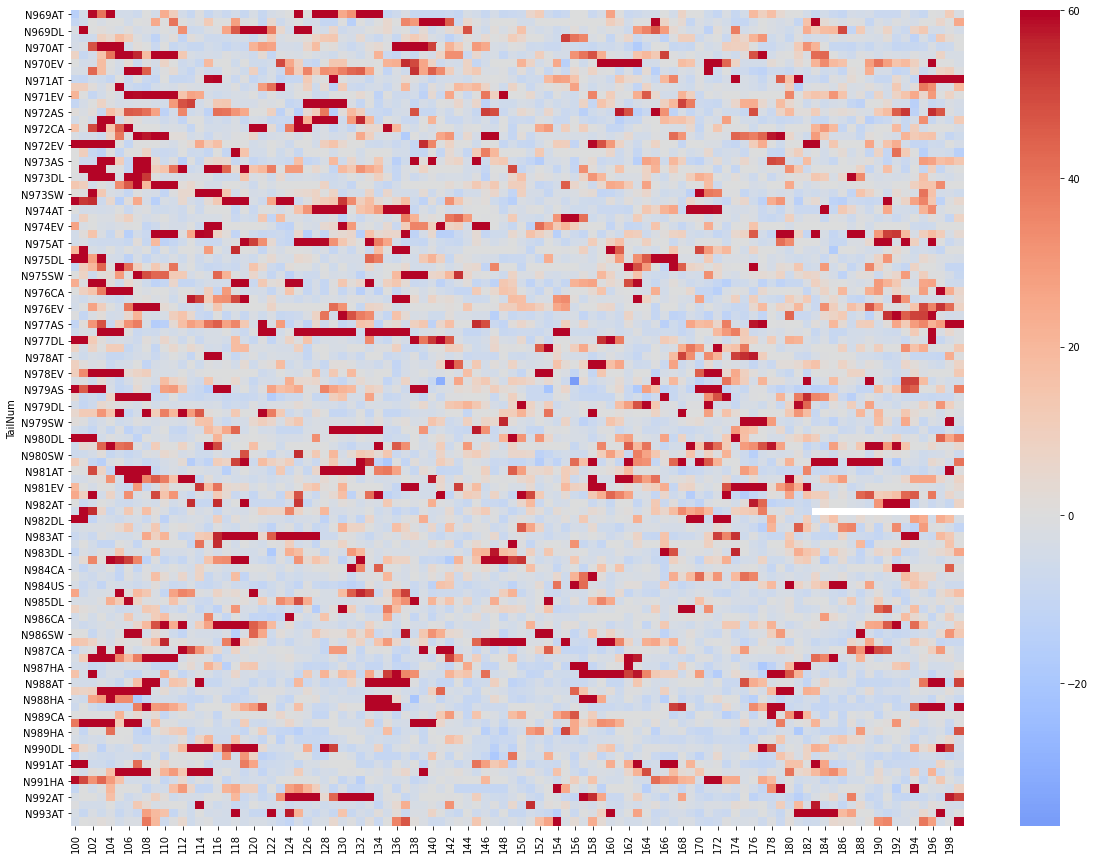

In [22]:
plt.subplots(figsize=(20,15))
sns.heatmap(heatmap_100, annot=False, fmt="g", cmap='coolwarm', vmax=60 , center=0)
plt.show()

The horizontal clusters of red suggest the cascading delays of airplanes, an increase of redness in those same clusters shows the worsening of the delay while return to normalcy is shown by the shading out effect